# Изучение рынка игр

## Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
from scipy import stats as st
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
from functools import partial
from IPython.display import display
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
figsize = (15, 5)
alpha=1

In [4]:
games = pd.read_csv('datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Шаг 1. Вывод

В представленных данных есть пропуски везде, кроме колонок с жанром и продажами. Причины пропусков будут понятнее при детальном изучении. Типы данных нужно оптимизировать: год релиза не имеет нужды в дробной части, поэтому нужно преобразовать в целочисленный тип; оценки критиков содержат целые числа, поэтому также должны иметь целочисленный тип; оценки пользователей содержат дробные числа, поэтому должны иметь тип float. Имена колонок содержат заглавные буквы, которые нужно преобразовать в строчные для удобства работы.

## Шаг 2. Подготовка данных

### Замена названий колонок

In [12]:
for column in games.columns:
    games.rename(columns={column: str.lower(column)}, inplace=True)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия колонок преобразованы к нижнему регистру.

### Удаление дубликатов

In [13]:
print('Количество дупликатов:', games.duplicated().sum())

Количество дупликатов: 0


Дубликаты отсутствуют.

### Преобразование данных в нужные типы

#### Преобразование данных в годах выпуска

Год релиза не имеет нужды в дробной части, поэтому нужно преобразовать в целочисленный тип. Но сначала нужно обработать пропуски:

In [14]:
# функция показа количества и доли пропусков в колонке
def show_loss(column):
    loss_quantity = len(games[games[column].isna()])
    loss_rate = loss_quantity / len(games)
    print(f'{column}: количество пропусков {loss_quantity}, доля пропусков {loss_rate:.1%}')

In [15]:
show_loss(column='year_of_release')

year_of_release: количество пропусков 269, доля пропусков 1.6%


Каждая игра имеет год выпуска. Если год не заполнен, то это технический сбой. Доля пропусков составляет лишь 1.6%, что позволяет удалить их без ущерба целостности данных:

In [16]:
games.drop(index=games.query('year_of_release.isna()', engine='python').index, axis=1, inplace=True) 
show_loss(column='year_of_release')

year_of_release: количество пропусков 0, доля пропусков 0.0%


Теперь можно приводить к типу int:

In [17]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'].dtype

dtype('int32')

269 записей с пропусками в годах выпуска удалены. Тип данных годов выпуска преобразован в int.

#### Преобразование данных в оценках пользователей

Оценки пользователей содержат дробные числа, поэтому должны иметь тип float. Но сначала нужно избавиться от строковых значений:

In [18]:
games.query('user_score == "tbd"').shape[0]

2376

"tbd" означает "To be define", оценка не присвоена. Данные игры прошли мимо аудитории, даже не удостоившись оценок.

In [19]:
show_loss(column='user_score')

user_score: количество пропусков 6607, доля пропусков 40.2%


tbd и NaN в данном случае - одно и то же. Лучше иметь один тип пропусков, чем два. Заменим tbd на NaN:

In [20]:
games['user_score'] = games['user_score'].apply(lambda x: np.nan if x == 'tbd' else x).astype('float')
games['user_score'].dtype

dtype('float64')

2376 значения 'tbd' в оценках пользователей преобразованы в NaN. Тип данных оценок пользователей преобразован во float.

#### Преобразование данных в оценках критиков

Оценки критиков содержат целые числа, поэтому должны иметь целочисленный тип. Но сначала нужно заполнить пропуски:

In [21]:
show_loss(column='critic_score')

critic_score: количество пропусков 8463, доля пропусков 51.5%


In [22]:
print('Количество пропусков одновремено в critic_score и user_score',
    len(games.query('critic_score.isna() and user_score.isna()', engine='python'))
     )

Количество пропусков одновремено в critic_score и user_score 7894


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


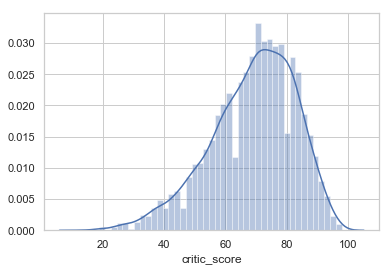

In [23]:
sns.distplot(games.query('not critic_score.isna()', engine='python')['critic_score'])
plt.show()

In [24]:
games.query('not critic_score.isna()', engine='python')['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Пропуски в оценках критиков в 51% записей, в 93% случаях пропуски одновременно присутствуют и в оценках пользователей. Медиана 71. Пропуски нельзя заполнить нулями, так как это исказит данные. Посмотрим на корреляции:

Добавим колонку с суммой продаж по всем регионам:

In [25]:
games['all_sales'] = (games.copy()['na_sales'] + games.copy()['eu_sales'] +
                      games.copy()['jp_sales'] + games.copy()['other_sales'])

In [26]:
def correlation(data):
    cols = ([col for col in games.columns if 'sales' in col] +
            [col for col in games.columns if 'score' in col])
    corrMatrix = data[cols].corr()
    display(corrMatrix.style.background_gradient(cmap='coolwarm'))
    print('')

In [27]:
print('Корреляция по всем годам:')
correlation(games)
print('Коррелияция по каждому году:\n')
for group, data in games.groupby('year_of_release'):
    print(f'{group}:')
    correlation(data)

Корреляция по всем годам:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.766540,0.451087,0.638433,0.941237,0.240083,0.085549
eu_sales,0.766540,1.000000,0.435875,0.722675,0.901674,0.221276,0.055530
jp_sales,0.451087,0.435875,1.000000,0.291560,0.613260,0.153474,0.126372
other_sales,0.638433,0.722675,0.291560,1.000000,0.748911,0.198410,0.056935
all_sales,0.941237,0.901674,0.613260,0.748911,1.000000,0.245349,0.087984
critic_score,0.240083,0.221276,0.153474,0.198410,0.245349,1.000000,0.579671
user_score,0.085549,0.055530,0.126372,0.056935,0.087984,0.579671,1.000000



Коррелияция по каждому году:

1980:


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.997819,nan,0.987310,0.999990,nan,nan
eu_sales,0.997819,1.000000,nan,0.984613,0.998070,nan,nan
jp_sales,nan,nan,nan,nan,nan,nan,nan
other_sales,0.987310,0.984613,nan,1.000000,0.987569,nan,nan
all_sales,0.999990,0.998070,nan,0.987569,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1981:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.995844,nan,0.957995,0.999983,nan,nan
eu_sales,0.995844,1.000000,nan,0.951677,0.996254,nan,nan
jp_sales,nan,nan,nan,nan,nan,nan,nan
other_sales,0.957995,0.951677,nan,1.000000,0.958861,nan,nan
all_sales,0.999983,0.996254,nan,0.958861,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1982:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.999063,nan,0.970972,0.999994,nan,nan
eu_sales,0.999063,1.000000,nan,0.970020,0.999164,nan,nan
jp_sales,nan,nan,nan,nan,nan,nan,nan
other_sales,0.970972,0.970020,nan,1.000000,0.971580,nan,nan
all_sales,0.999994,0.999164,nan,0.971580,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1983:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.499856,-0.133129,0.684061,0.234102,nan,nan
eu_sales,0.499856,1.000000,0.409765,0.899338,0.610115,nan,nan
jp_sales,-0.133129,0.409765,1.000000,0.359904,0.931714,nan,nan
other_sales,0.684061,0.899338,0.359904,1.000000,0.620300,nan,nan
all_sales,0.234102,0.610115,0.931714,0.620300,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1984:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.769056,-0.289602,0.996401,0.995165,nan,nan
eu_sales,0.769056,1.000000,0.026957,0.817167,0.800423,nan,nan
jp_sales,-0.289602,0.026957,1.000000,-0.256472,-0.195593,nan,nan
other_sales,0.996401,0.817167,-0.256472,1.000000,0.996059,nan,nan
all_sales,0.995165,0.800423,-0.195593,0.996059,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1985:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.997249,0.962018,0.998911,0.998763,nan,nan
eu_sales,0.997249,1.000000,0.971206,0.998428,0.998502,nan,nan
jp_sales,0.962018,0.971206,1.000000,0.967795,0.974311,nan,nan
other_sales,0.998911,0.998428,0.967795,1.000000,0.999046,nan,nan
all_sales,0.998763,0.998502,0.974311,0.999046,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1986:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.980164,0.013921,0.075952,0.857516,nan,nan
eu_sales,0.980164,1.000000,0.045527,-0.032449,0.836632,nan,nan
jp_sales,0.013921,0.045527,1.000000,-0.143382,0.473699,nan,nan
other_sales,0.075952,-0.032449,-0.143382,1.000000,0.220330,nan,nan
all_sales,0.857516,0.836632,0.473699,0.220330,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1987:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.980056,0.082480,0.974076,0.737452,nan,nan
eu_sales,0.980056,1.000000,0.179675,0.992679,0.794157,nan,nan
jp_sales,0.082480,0.179675,1.000000,0.192780,0.733420,nan,nan
other_sales,0.974076,0.992679,0.192780,1.000000,0.798828,nan,nan
all_sales,0.737452,0.794157,0.733420,0.798828,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1988:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.977814,0.522706,0.984512,0.965979,nan,nan
eu_sales,0.977814,1.000000,0.583191,0.992336,0.974271,nan,nan
jp_sales,0.522706,0.583191,1.000000,0.547249,0.722382,nan,nan
other_sales,0.984512,0.992336,0.547249,1.000000,0.966936,nan,nan
all_sales,0.965979,0.974271,0.722382,0.966936,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1989:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.862843,0.848915,0.954055,0.991126,nan,nan
eu_sales,0.862843,1.000000,0.924265,0.957713,0.914842,nan,nan
jp_sales,0.848915,0.924265,1.000000,0.932248,0.908646,nan,nan
other_sales,0.954055,0.957713,0.932248,1.000000,0.980869,nan,nan
all_sales,0.991126,0.914842,0.908646,0.980869,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1990:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.986458,0.649809,0.845027,0.986608,nan,nan
eu_sales,0.986458,1.000000,0.644038,0.876358,0.980301,nan,nan
jp_sales,0.649809,0.644038,1.000000,0.525271,0.760908,nan,nan
other_sales,0.845027,0.876358,0.525271,1.000000,0.846040,nan,nan
all_sales,0.986608,0.980301,0.760908,0.846040,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1991:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.970508,0.302721,0.768878,0.956912,nan,nan
eu_sales,0.970508,1.000000,0.318972,0.790315,0.949708,nan,nan
jp_sales,0.302721,0.318972,1.000000,0.465609,0.560446,nan,nan
other_sales,0.768878,0.790315,0.465609,1.000000,0.825800,nan,nan
all_sales,0.956912,0.949708,0.560446,0.825800,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1992:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.933124,0.509296,0.984515,0.940731,nan,nan
eu_sales,0.933124,1.000000,0.482222,0.956369,0.905022,nan,nan
jp_sales,0.509296,0.482222,1.000000,0.549990,0.765011,nan,nan
other_sales,0.984515,0.956369,0.549990,1.000000,0.952414,nan,nan
all_sales,0.940731,0.905022,0.765011,0.952414,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1993:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.992797,0.405053,0.827079,0.952170,nan,nan
eu_sales,0.992797,1.000000,0.416824,0.836394,0.953632,nan,nan
jp_sales,0.405053,0.416824,1.000000,0.307446,0.663219,nan,nan
other_sales,0.827079,0.836394,0.307446,1.000000,0.792904,nan,nan
all_sales,0.952170,0.953632,0.663219,0.792904,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1994:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.667404,0.495764,0.837746,0.935078,nan,nan
eu_sales,0.667404,1.000000,0.221404,0.609493,0.759639,nan,nan
jp_sales,0.495764,0.221404,1.000000,0.342978,0.696478,nan,nan
other_sales,0.837746,0.609493,0.342978,1.000000,0.785057,nan,nan
all_sales,0.935078,0.759639,0.696478,0.785057,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1995:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.833869,0.237346,0.785898,0.868964,nan,nan
eu_sales,0.833869,1.000000,0.105465,0.902021,0.783410,nan,nan
jp_sales,0.237346,0.105465,1.000000,0.182505,0.650565,nan,nan
other_sales,0.785898,0.902021,0.182505,1.000000,0.773158,nan,nan
all_sales,0.868964,0.783410,0.650565,0.773158,1.000000,nan,nan
critic_score,nan,nan,nan,nan,nan,nan,nan
user_score,nan,nan,nan,nan,nan,nan,nan



1996:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.917533,0.745350,0.806899,0.956444,-0.012407,0.568643
eu_sales,0.917533,1.000000,0.825514,0.865560,0.970530,0.373543,0.605088
jp_sales,0.745350,0.825514,1.000000,0.745131,0.894123,0.188748,-0.029330
other_sales,0.806899,0.865560,0.745131,1.000000,0.864273,0.144091,0.503600
all_sales,0.956444,0.970530,0.894123,0.864273,1.000000,0.210648,0.541598
critic_score,-0.012407,0.373543,0.188748,0.144091,0.210648,1.000000,0.422020
user_score,0.568643,0.605088,-0.029330,0.503600,0.541598,0.422020,1.000000



1997:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.703032,0.278852,0.575654,0.893291,0.633214,0.560033
eu_sales,0.703032,1.000000,0.398074,0.816430,0.873727,0.429997,0.304662
jp_sales,0.278852,0.398074,1.000000,0.676224,0.609986,0.367934,0.260290
other_sales,0.575654,0.816430,0.676224,1.000000,0.834714,0.398671,0.361015
all_sales,0.893291,0.873727,0.609986,0.834714,1.000000,0.553818,0.447389
critic_score,0.633214,0.429997,0.367934,0.398671,0.553818,1.000000,0.526120
user_score,0.560033,0.304662,0.260290,0.361015,0.447389,0.526120,1.000000



1998:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.766034,0.419552,0.762461,0.921767,0.432510,0.336558
eu_sales,0.766034,1.000000,0.470430,0.916995,0.900405,0.328249,0.284723
jp_sales,0.419552,0.470430,1.000000,0.573754,0.669493,0.409726,0.356949
other_sales,0.762461,0.916995,0.573754,1.000000,0.901948,0.378747,0.347406
all_sales,0.921767,0.900405,0.669493,0.901948,1.000000,0.439656,0.363567
critic_score,0.432510,0.328249,0.409726,0.378747,0.439656,1.000000,0.856853
user_score,0.336558,0.284723,0.356949,0.347406,0.363567,0.856853,1.000000



1999:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.895164,0.631545,0.838394,0.949699,0.408242,0.205982
eu_sales,0.895164,1.000000,0.669805,0.957199,0.946752,0.376201,0.152982
jp_sales,0.631545,0.669805,1.000000,0.654771,0.817445,0.314227,0.148586
other_sales,0.838394,0.957199,0.654771,1.000000,0.904845,0.411147,0.178999
all_sales,0.949699,0.946752,0.817445,0.904845,1.000000,0.421580,0.197156
critic_score,0.408242,0.376201,0.314227,0.411147,0.421580,1.000000,0.382472
user_score,0.205982,0.152982,0.148586,0.178999,0.197156,0.382472,1.000000



2000:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.866619,0.139608,0.691548,0.901008,0.311208,0.097071
eu_sales,0.866619,1.000000,0.108824,0.748721,0.866659,0.232197,0.148492
jp_sales,0.139608,0.108824,1.000000,0.227224,0.512585,0.203215,0.217580
other_sales,0.691548,0.748721,0.227224,1.000000,0.762349,0.309131,0.186617
all_sales,0.901008,0.866659,0.512585,0.762349,1.000000,0.324104,0.178213
critic_score,0.311208,0.232197,0.203215,0.309131,0.324104,1.000000,0.626893
user_score,0.097071,0.148492,0.217580,0.186617,0.178213,0.626893,1.000000



2001:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.847919,0.446041,0.779547,0.959267,0.385254,0.198640
eu_sales,0.847919,1.000000,0.437963,0.907014,0.934752,0.296102,0.146115
jp_sales,0.446041,0.437963,1.000000,0.376260,0.597265,0.285375,0.214398
other_sales,0.779547,0.907014,0.376260,1.000000,0.864484,0.284256,0.129032
all_sales,0.959267,0.934752,0.597265,0.864484,1.000000,0.371707,0.200198
critic_score,0.385254,0.296102,0.285375,0.284256,0.371707,1.000000,0.717803
user_score,0.198640,0.146115,0.214398,0.129032,0.200198,0.717803,1.000000



2002:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.844567,0.454900,0.758398,0.954743,0.288220,0.149557
eu_sales,0.844567,1.000000,0.438105,0.907329,0.933496,0.231230,0.091781
jp_sales,0.454900,0.438105,1.000000,0.242590,0.613587,0.186522,0.153035
other_sales,0.758398,0.907329,0.242590,1.000000,0.825642,0.208824,0.071400
all_sales,0.954743,0.933496,0.613587,0.825642,1.000000,0.283328,0.141339
critic_score,0.288220,0.231230,0.186522,0.208824,0.283328,1.000000,0.585943
user_score,0.149557,0.091781,0.153035,0.071400,0.141339,0.585943,1.000000



2003:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.769660,0.271630,0.662642,0.932530,0.287237,0.120442
eu_sales,0.769660,1.000000,0.223044,0.911212,0.909286,0.206215,0.083409
jp_sales,0.271630,0.223044,1.000000,0.164565,0.448250,0.106951,0.049627
other_sales,0.662642,0.911212,0.164565,1.000000,0.818876,0.187874,0.079704
all_sales,0.932530,0.909286,0.448250,0.818876,1.000000,0.265289,0.111520
critic_score,0.287237,0.206215,0.106951,0.187874,0.265289,1.000000,0.635463
user_score,0.120442,0.083409,0.049627,0.079704,0.111520,0.635463,1.000000



2004:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.450029,0.289420,0.617152,0.907007,0.329675,0.180467
eu_sales,0.450029,1.000000,0.270804,0.136522,0.610882,0.226130,0.106321
jp_sales,0.289420,0.270804,1.000000,0.191224,0.485566,0.153978,0.132566
other_sales,0.617152,0.136522,0.191224,1.000000,0.758074,0.146177,0.085202
all_sales,0.907007,0.610882,0.485566,0.758074,1.000000,0.313629,0.177251
critic_score,0.329675,0.226130,0.153978,0.146177,0.313629,1.000000,0.568975
user_score,0.180467,0.106321,0.132566,0.085202,0.177251,0.568975,1.000000



2005:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.822343,0.583216,0.827556,0.919639,0.276114,0.137979
eu_sales,0.822343,1.000000,0.724518,0.919755,0.962908,0.163640,0.079745
jp_sales,0.583216,0.724518,1.000000,0.620984,0.791962,0.107436,0.072785
other_sales,0.827556,0.919755,0.620984,1.000000,0.919454,0.191626,0.095855
all_sales,0.919639,0.962908,0.791962,0.919454,1.000000,0.210585,0.109143
critic_score,0.276114,0.163640,0.107436,0.191626,0.210585,1.000000,0.576178
user_score,0.137979,0.079745,0.072785,0.095855,0.109143,0.576178,1.000000



2006:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.970878,0.574295,0.962262,0.987780,0.117037,0.060736
eu_sales,0.970878,1.000000,0.597339,0.968562,0.986948,0.089591,0.051420
jp_sales,0.574295,0.597339,1.000000,0.614155,0.667317,0.139123,0.083310
other_sales,0.962262,0.968562,0.614155,1.000000,0.977329,0.128724,0.067262
all_sales,0.987780,0.986948,0.667317,0.977329,1.000000,0.115328,0.062642
critic_score,0.117037,0.089591,0.139123,0.128724,0.115328,1.000000,0.564743
user_score,0.060736,0.051420,0.083310,0.067262,0.062642,0.564743,1.000000



2007:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.785272,0.469920,0.611935,0.941102,0.271058,0.140189
eu_sales,0.785272,1.000000,0.572082,0.561208,0.914310,0.257182,0.142678
jp_sales,0.469920,0.572082,1.000000,0.373478,0.644618,0.156306,0.128685
other_sales,0.611935,0.561208,0.373478,1.000000,0.719238,0.233422,0.141404
all_sales,0.941102,0.914310,0.644618,0.719238,1.000000,0.283690,0.160674
critic_score,0.271058,0.257182,0.156306,0.233422,0.283690,1.000000,0.643875
user_score,0.140189,0.142678,0.128685,0.141404,0.160674,0.643875,1.000000



2008:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.872822,0.486153,0.742968,0.961435,0.290078,0.130036
eu_sales,0.872822,1.000000,0.519028,0.737498,0.947087,0.258966,0.123878
jp_sales,0.486153,0.519028,1.000000,0.406869,0.630551,0.162634,0.151878
other_sales,0.742968,0.737498,0.406869,1.000000,0.809557,0.305873,0.139568
all_sales,0.961435,0.947087,0.630551,0.809557,1.000000,0.290574,0.146380
critic_score,0.290078,0.258966,0.162634,0.305873,0.290574,1.000000,0.635062
user_score,0.130036,0.123878,0.151878,0.139568,0.146380,0.635062,1.000000



2009:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.863014,0.587318,0.865994,0.966664,0.238470,0.108150
eu_sales,0.863014,1.000000,0.560496,0.872607,0.941790,0.243790,0.113520
jp_sales,0.587318,0.560496,1.000000,0.522764,0.698916,0.149685,0.107913
other_sales,0.865994,0.872607,0.522764,1.000000,0.906911,0.292934,0.133026
all_sales,0.966664,0.941790,0.698916,0.906911,1.000000,0.249550,0.120709
critic_score,0.238470,0.243790,0.149685,0.292934,0.249550,1.000000,0.659171
user_score,0.108150,0.113520,0.107913,0.133026,0.120709,0.659171,1.000000



2010:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.803450,0.215427,0.803327,0.942619,0.255855,0.102113
eu_sales,0.803450,1.000000,0.302640,0.958113,0.924397,0.310118,0.133588
jp_sales,0.215427,0.302640,1.000000,0.246852,0.434160,0.140775,0.163545
other_sales,0.803327,0.958113,0.246852,1.000000,0.905032,0.313436,0.136569
all_sales,0.942619,0.924397,0.434160,0.905032,1.000000,0.299539,0.134965
critic_score,0.255855,0.310118,0.140775,0.313436,0.299539,1.000000,0.639794
user_score,0.102113,0.133588,0.163545,0.136569,0.134965,0.639794,1.000000



2011:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.831016,0.312365,0.850500,0.952271,0.366089,0.092332
eu_sales,0.831016,1.000000,0.347216,0.974488,0.947150,0.394374,0.098733
jp_sales,0.312365,0.347216,1.000000,0.291145,0.453202,0.159204,0.164568
other_sales,0.850500,0.974488,0.291145,1.000000,0.943055,0.415089,0.116619
all_sales,0.952271,0.947150,0.453202,0.943055,1.000000,0.391431,0.114144
critic_score,0.366089,0.394374,0.159204,0.415089,0.391431,1.000000,0.583112
user_score,0.092332,0.098733,0.164568,0.116619,0.114144,0.583112,1.000000



2012:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.772382,0.285999,0.723868,0.918895,0.266870,-0.016603
eu_sales,0.772382,1.000000,0.335252,0.945350,0.930861,0.289344,-0.011356
jp_sales,0.285999,0.335252,1.000000,0.229222,0.496251,0.105680,0.141493
other_sales,0.723868,0.945350,0.229222,1.000000,0.872176,0.261639,-0.018458
all_sales,0.918895,0.930861,0.496251,0.872176,1.000000,0.293247,0.011584
critic_score,0.266870,0.289344,0.105680,0.261639,0.293247,1.000000,0.571305
user_score,-0.016603,-0.011356,0.141493,-0.018458,0.011584,0.571305,1.000000



2013:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.827642,0.259919,0.791154,0.934185,0.300332,0.002619
eu_sales,0.827642,1.000000,0.331427,0.947615,0.952649,0.308029,0.008547
jp_sales,0.259919,0.331427,1.000000,0.224347,0.453229,0.155010,0.234556
other_sales,0.791154,0.947615,0.224347,1.000000,0.903924,0.280741,0.025085
all_sales,0.934185,0.952649,0.453229,0.903924,1.000000,0.320387,0.026409
critic_score,0.300332,0.308029,0.155010,0.280741,0.320387,1.000000,0.495227
user_score,0.002619,0.008547,0.234556,0.025085,0.026409,0.495227,1.000000



2014:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.776168,0.325626,0.831291,0.925583,0.346878,-0.060322
eu_sales,0.776168,1.000000,0.221571,0.942361,0.917761,0.310996,-0.043866
jp_sales,0.325626,0.221571,1.000000,0.194311,0.479260,0.175823,0.211591
other_sales,0.831291,0.942361,0.194311,1.000000,0.917483,0.303511,-0.042245
all_sales,0.925583,0.917761,0.479260,0.917483,1.000000,0.355064,-0.023283
critic_score,0.346878,0.310996,0.175823,0.303511,0.355064,1.000000,0.568730
user_score,-0.060322,-0.043866,0.211591,-0.042245,-0.023283,0.568730,1.000000



2015:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.738723,0.122568,0.865481,0.913152,0.373406,0.026052
eu_sales,0.738723,1.000000,0.137164,0.926607,0.923424,0.279985,-0.024772
jp_sales,0.122568,0.137164,1.000000,0.115728,0.304315,0.101471,0.204189
other_sales,0.865481,0.926607,0.115728,1.000000,0.954216,0.320952,0.000615
all_sales,0.913152,0.923424,0.304315,0.954216,1.000000,0.359450,0.027065
critic_score,0.373406,0.279985,0.101471,0.320952,0.359450,1.000000,0.498876
user_score,0.026052,-0.024772,0.204189,0.000615,0.027065,0.498876,1.000000



2016:


,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
na_sales,1.000000,0.607210,0.416704,0.786022,0.868022,0.332352,-0.052905
eu_sales,0.607210,1.000000,0.180046,0.920918,0.898114,0.228317,-0.052927
jp_sales,0.416704,0.180046,1.000000,0.223442,0.468117,0.171299,0.170142
other_sales,0.786022,0.920918,0.223442,1.000000,0.942378,0.266860,-0.047854
all_sales,0.868022,0.898114,0.468117,0.942378,1.000000,0.297544,-0.045815
critic_score,0.332352,0.228317,0.171299,0.266860,0.297544,1.000000,0.439906
user_score,-0.052905,-0.052927,0.170142,-0.047854,-0.045815,0.439906,1.000000


Между оценками критиков и другими колонками нет сильных корреляций. Чтобы не искажать данные, тип данных оценок критиков оставлен float. Добавлена колонка с суммой продаж по всем регионам.

### Обработка пропусков

#### Пропуски в названии и жанре

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  all_sales        16446 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [29]:
show_loss(column='name')

name: количество пропусков 2, доля пропусков 0.0%


In [30]:
games.query('name.isna()', engine='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


2 записи с пропусками одновременно в названии игры и жанре. Однозначно технический сбой. Нет смысла держать их в базе:

In [31]:
games.query('name.isna()', engine='python').index
games.drop(index=games.query('name.isna()', engine='python').index, axis=1, inplace=True)
show_loss(column='name')

name: количество пропусков 0, доля пропусков 0.0%


2 пропуска одновременно в названии и жанре удалены.

#### Пропуски в оценках пользователей

In [32]:
show_loss(column='user_score')

user_score: количество пропусков 8981, доля пропусков 54.6%


In [33]:
print('Количество пропусков одновремено в user_score и critic_score',
    len(games.query('user_score.isna() and critic_score.isna()', engine='python'))
     )

Количество пропусков одновремено в user_score и critic_score 7892


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


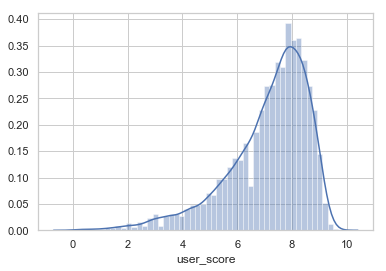

In [34]:
sns.distplot(games.query('not user_score.isna()', engine='python')['user_score'])
plt.show()

In [35]:
games.query('not user_score.isna()', engine='python')['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Пропуски в оценках пользователей в 54% записей, в 87% случаях пропуски одновременно присутствуют и в оценках критиков. Медиана 7.5. Пропуски нельзя заполнить нулями, так как это исказит данные. Как видно на вышеприведенных кореляциях, между оценками пользователей и другими колонками нет сильных корреляций. Чтобы не искажать данные, пропуски оставлены без изменений.

#### Пропуски в рейтинге

In [36]:
print('Заполненные рейтинги:')
games.query('not rating.isna()', engine='python').groupby('year_of_release').count()['name']

Заполненные рейтинги:


year_of_release
1985       1
1988       1
1992       2
1994       1
1996       7
1997      19
1998      32
1999      42
2000     148
2001     339
2002     655
2003     613
2004     598
2005     706
2006     678
2007     821
2008     981
2009    1011
2010     799
2011     703
2012     355
2013     316
2014     345
2015     315
2016     280
Name: name, dtype: int64

In [37]:
print('Пропущенные рейтинги:')
games.query('rating.isna()', engine='python').groupby('year_of_release').count()['name']

Пропущенные рейтинги:


year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     41
1993     60
1994    120
1995    219
1996    256
1997    270
1998    347
1999    296
2000    202
2001    143
2002    174
2003    162
2004    164
2005    233
2006    328
2007    376
2008    446
2009    415
2010    456
2011    433
2012    298
2013    228
2014    236
2015    291
2016    222
Name: name, dtype: int64

In [38]:
show_loss(column='rating')

rating: количество пропусков 6676, доля пропусков 40.6%


In [39]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски в рейтинге присутствуют по объективным причинам (до 1994 года рейтинг не составлялся) и по техническим. На основании других колонок заполнить рейтинг не получится. Чтобы не оставлять брешь в данных, заполним пропуски значением 'missing':

In [40]:
games['rating'].fillna('missing', inplace=True)
show_loss(column='rating')

rating: количество пропусков 0, доля пропусков 0.0%


6676 пропусков в рейтинге заполнены значением 'missing'.

### Шаг 2. Вывод

Названия колонок преобразованы к нижнему регистру.

Дубликаты отсутствуют.

269 записей с пропусками в годах выпуска удалены. Тип данных годов выпуска преобразован в int.

2376 значения 'tbd' в оценках пользователей преобразованы в NaN. Тип данных оценок пользователей преобразован во float.

Между оценками критиков и другими колонками нет сильных корреляций. Чтобы не искажать данные, тип данных оценок критиков оставлен float. Добавлена колонка с суммой продаж по всем регионам.

2 пропуска одновременно в названии и жанре удалены.

Пропуски в оценках пользователей в 54% записей, в 87% случаях пропуски одновременно присутствуют и в оценках критиков. Медиана 7.5. Пропуски нельзя заполнить нулями, так как это исказит данные. Между оценками пользователей и другими колонками нет сильных корреляций. Чтобы не искажать данные, пропуски оставлены без изменений.

6676 пропусков в рейтинге заполнены значением 'missing'.

## Шаг 3. Исследовательский анализ данных

### Cколько игр выпускалось в разные годы? Важны ли данные за все периоды?

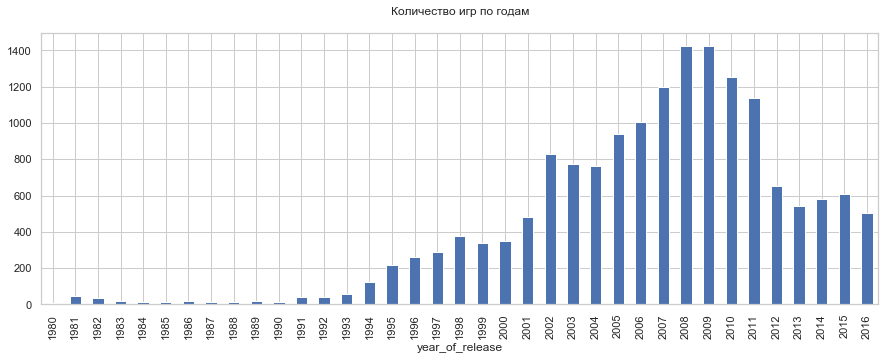

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [41]:
games_by_years = games.groupby('year_of_release').count()['name']
games_by_years.plot(kind='bar', figsize=(15,5), grid=True, title=f'Количество игр по годам\n')
plt.show()
display(games_by_years)

Максимальное количество игр выпущено в 2009 году (1476), минимальное - в самом начале игровой индустрии в 1980 году (9). Расцвет игровой индустрии пришелся на 2008-2009 годы, после чего производство игр стало снижаться. Может быть, это связано с общемировым экономическим кризисом, начавшемся в 2008 году.

Для анализа текущей рыночной обстановки важны актуальные данные. Актуальными можно считать данные за последние годы, включающие средний срок жизни игровой платформы.

### Как менялись продажи по платформам с наибольшими суммарными продажами? За какой характерный срок появляются новые и исчезают старые платформы?

In [42]:
def sales(data, column='platform', show_plot=False):
    pivot = data.pivot_table(index='year_of_release', columns=column, aggfunc='sum', fill_value=0)['all_sales']
    if show_plot == True:
        pivot.plot(kind='line', figsize=(15,5), grid=True, title=f'Платформы по суммарным продажам в млн $:\n')
        plt.show()
    return pivot

In [43]:
def show_top(liders=3):
    top = games.groupby('platform').sum()['all_sales'].sort_values(ascending=False).head(liders)
    print(f'Топ-{liders} платформ по суммарным продажам в млн $:\n')
    display(top)
    display(sales(data=games.query('platform in @top.index'), show_plot=True))

Топ-3 платформ по суммарным продажам в млн $:



platform
PS2     1233.56
X360     961.24
PS3      931.34
Name: all_sales, dtype: float64

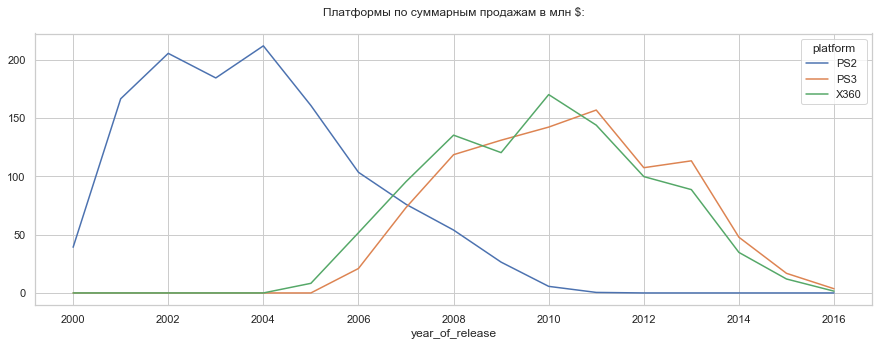

platform,PS2,PS3,X360
year_of_release,,,
2000,39.17,0.00,0.00
2001,166.43,0.00,0.00
2002,205.38,0.00,0.00
2003,184.31,0.00,0.00
2004,211.81,0.00,0.00
2005,160.66,0.00,8.25
2006,103.42,20.96,51.62
2007,75.99,73.19,95.41
2008,53.90,118.52,135.26


In [44]:
show_top()

Топ-10 платформ по суммарным продажам в млн $:



platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: all_sales, dtype: float64

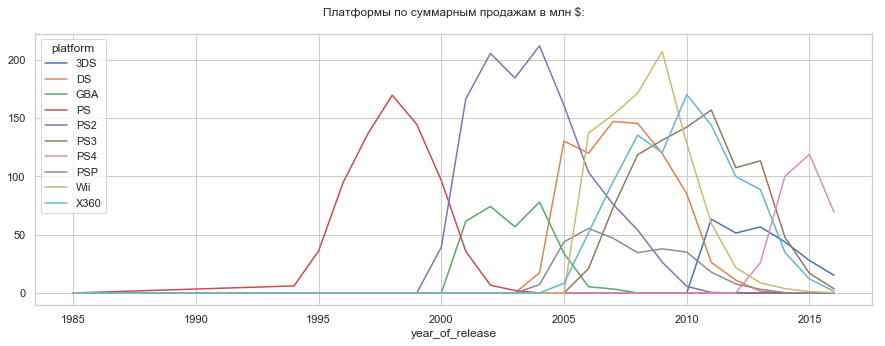

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994,0.00,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,0.07,96.37,39.17,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,61.53,35.59,166.43,0.00,0.00,0.00,0.00,0.00


In [45]:
show_top(10)

Платформы, завершившие свой жизненный цикл:


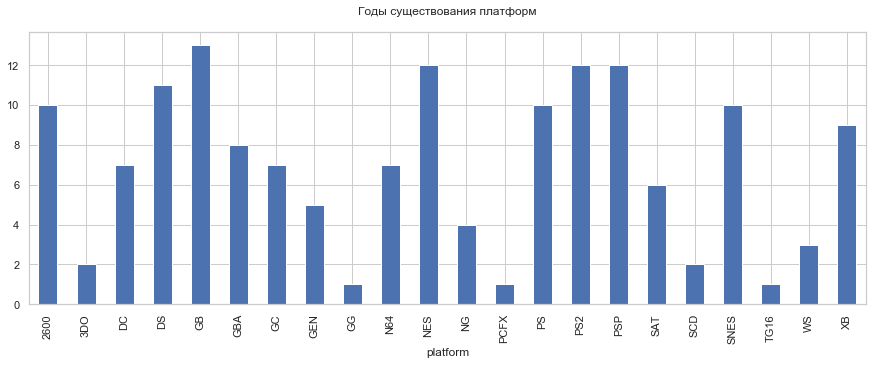

Характерный срок существования платформы в годах: 7.0


In [46]:
print('Платформы, завершившие свой жизненный цикл:')
non_actual_platforms = [col for col in sales(games).columns if sales(games).loc[2016, col] == 0]
platforms_life = sales(games)[non_actual_platforms].applymap(lambda x: np.nan if x == 0 else x).agg('count')
platforms_life.plot(kind='bar', figsize=(15,5), grid=True, title=f'Годы существования платформ\n')
plt.show()
platforms_life_median = platforms_life.median()
print(f'Характерный срок существования платформы в годах: {platforms_life_median}')

Построено распределение продаж по годам для топ-3 платформ с максимальными суммарными продажами.

Самая продавая платформа за все время - PS2. Появившись в 2000 году, она сразу выстрелила и за 2 года к 2002 году достигла своего первого пика продаж в 205.38 долларов млн  Еще через 2 года к 2004 году был достигнут еще больший пик продаж в 211.81 $ млн  Продажи сократились практически до нуля в 2011 году. Жизненный цикл растянулся на 10 лет.

На текущий момент выделяется только одна платформа по объему продаж - PS4. Остальные актуальные платформы практически завершили свой жизненный цикл.

Характерный срок существования платформы 7 лет.

### Данные за актуальный период

Прогноз строится для актуальных платформ. Это платформы с ненулевым продажами в последнем году:

In [47]:
actual_games = games.query('year_of_release > (year_of_release.max() - @platforms_life_median)')

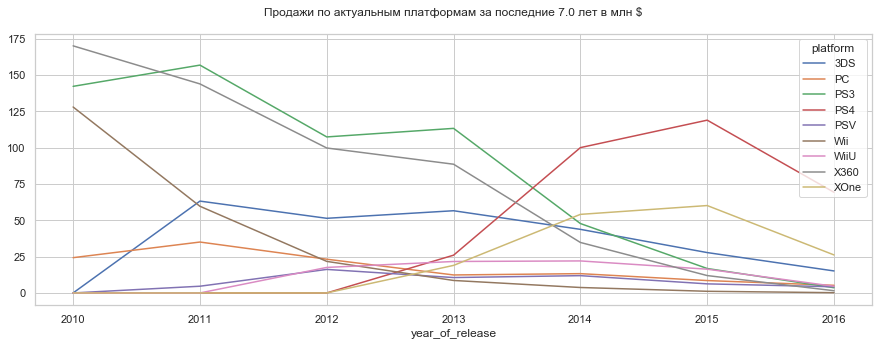

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2010,0.00,24.28,142.17,0.00,0.00,127.95,0.00,170.03,0.00
2011,63.20,35.03,156.78,0.00,4.63,59.65,0.00,143.84,0.00
2012,51.36,23.22,107.36,0.00,16.19,21.71,17.56,99.74,0.00
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


In [48]:
actual_platforms = [col for col in sales(games).columns if sales(games).loc[2016, col] > 0]
actual_platforms_sales = sales(actual_games)[actual_platforms]
actual_platforms_sales.plot(kind='line', figsize=(15,5), grid=True,
  title=f'Продажи по актуальным платформам за последние {platforms_life_median} лет в млн $\n')
plt.show()
display(actual_platforms_sales)

Взяты данные для актуальных платформ за актуальный период - последние 7 лет.

### Потенциально прибыльные платформы

В актуальном периоде за текущий и предыдущий годы лидируют 3 платформы по объемам продаж: PS4 (69.25 млн долл  в 2016г. и 118.90 млн долл  в 2015г), XOne (26.15 млн долл  в 2016г. и 60.14 млн долл  в 2015г.), 3DS (15.14 млн долл  в 2016г. и 27.78 млн долл  в 2015г.). В 2016 году продажи по всем платформам упали, в 2015 году продажи выросли только по двум лидерам: PS4 и XOne. Потенциально прибыльные платформы есть только среди лидеров продаж: PS4, XOne и 3DS.

### Глобальные продажи каждой игры и платформы

In [49]:
# функция построения боксплотов для выбранного диапазона продаж
def games_boxplots(sales_min=0, sales_max=99999, name=''):
    if name == '':
        names = (actual_games
         .groupby('name')
         .agg({'all_sales': 'sum',})
         .query('@sales_min <= all_sales <= @sales_max')
         .index
        )
        if sales_max == 99999:
            print(f'Игры с объемом продаж от {sales_min} $ млн')
        else:
            print(f'Игры с объемом продаж от {sales_min} до {sales_max} $ млн')
        print(f'Выбрано игр {len(names)}')
    else:
        names = name
        print(f'Игры {name}')
    table = actual_games.query('name in @names')
    print(f'Количество продаж выбранных игр {len(table)}')
    height_plot = max((len(names) / 2.5), 1)
    if len(table) > 0:
        f, ax = plt.subplots(figsize=(15, height_plot))
        fig = sns.boxplot(x='all_sales', y='name', data=table)
        plt.show()
        group_table = table.groupby('name').sum()['all_sales'].sort_values(ascending=True)
        group_table.plot(kind='barh', use_index=True, figsize=(15, height_plot), title='Общий объем продаж:')
        plt.show()
        display(group_table.sort_values(ascending=False))

Можно построить боксплоты для всех игр сразу, но этот код будет выполняться долго, ведь количество всех игр 3320. Отобразим боксплоты игр с продажами от 1 до 1.2 $ млн:

Игры с объемом продаж от 1 до 1.2 $ млн
Выбрано игр 68
Количество продаж выбранных игр 167


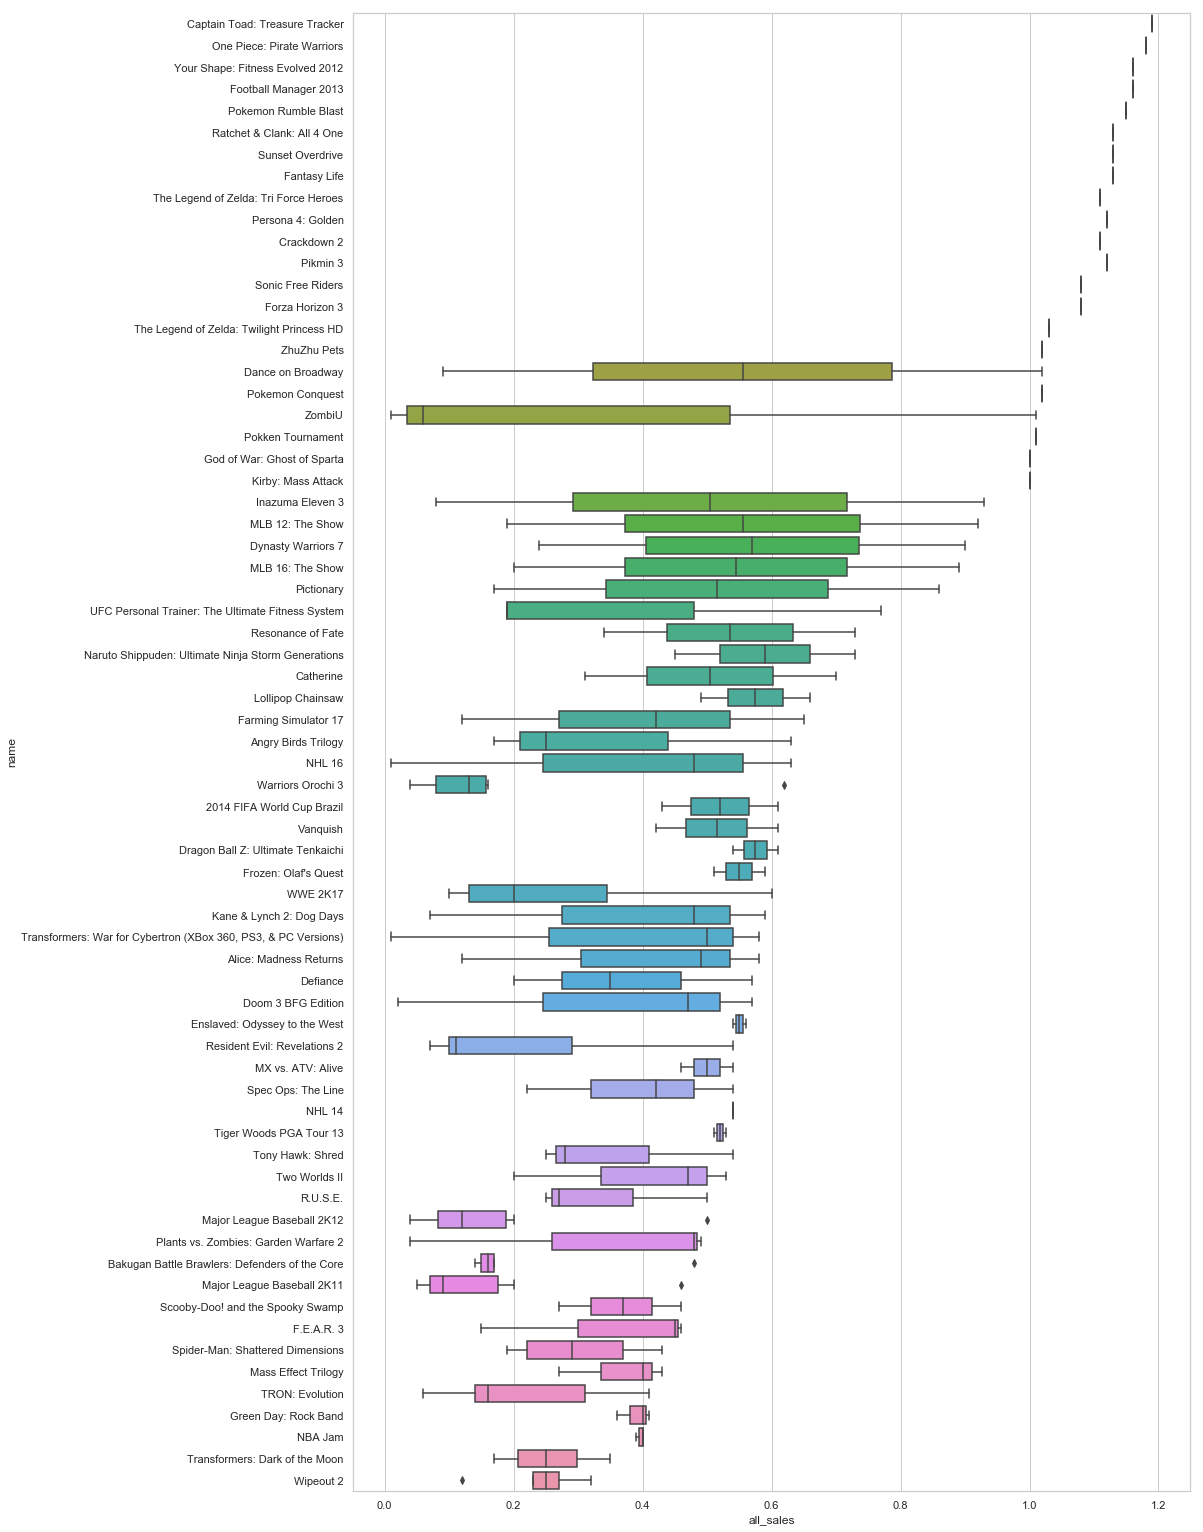

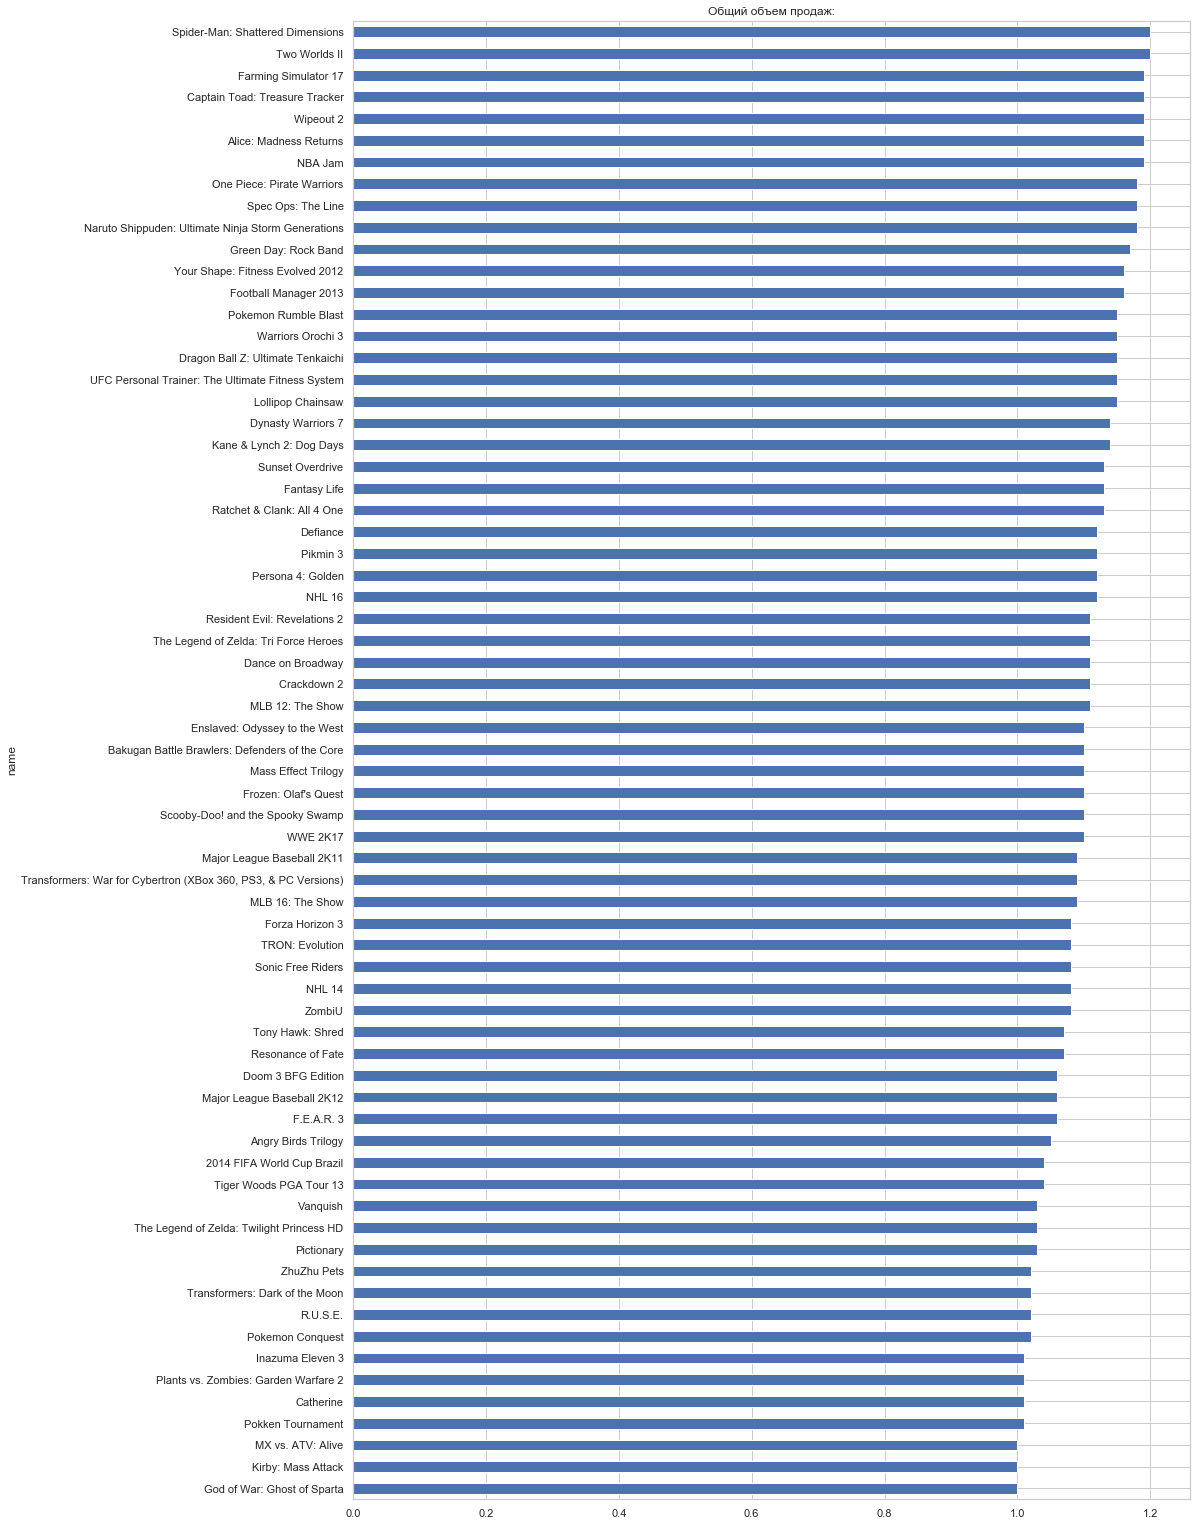

name
Spider-Man: Shattered Dimensions    1.20
Two Worlds II                       1.20
Farming Simulator 17                1.19
Captain Toad: Treasure Tracker      1.19
Wipeout 2                           1.19
                                    ... 
Catherine                           1.01
Pokken Tournament                   1.01
MX vs. ATV: Alive                   1.00
Kirby: Mass Attack                  1.00
God of War: Ghost of Sparta         1.00
Name: all_sales, Length: 68, dtype: float64

In [50]:
games_boxplots(sales_min=1, sales_max=1.2)

Посмотрим на топовые игры с продажами от 20 $ млн:

Игры с объемом продаж от 20 $ млн
Выбрано игр 10
Количество продаж выбранных игр 45


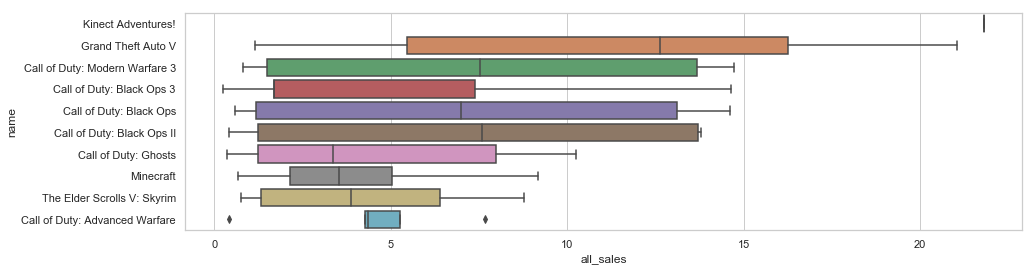

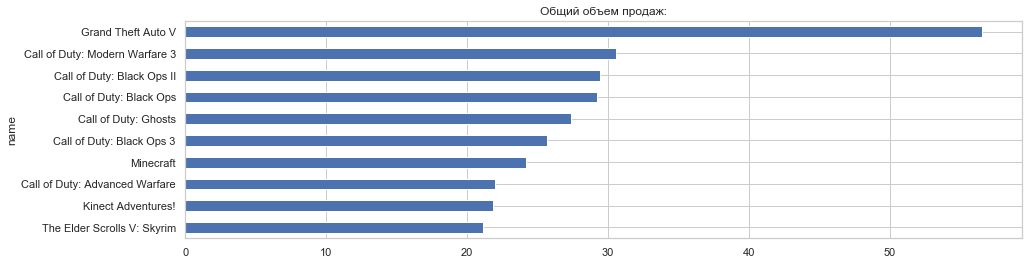

name
Grand Theft Auto V                56.58
Call of Duty: Modern Warfare 3    30.60
Call of Duty: Black Ops II        29.40
Call of Duty: Black Ops           29.20
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         24.16
Call of Duty: Advanced Warfare    21.97
Kinect Adventures!                21.82
The Elder Scrolls V: Skyrim       21.14
Name: all_sales, dtype: float64

In [51]:
games_boxplots(sales_min=20)

Посмотрим на игры с продажами до 0.015 $ млн:

Игры с объемом продаж от 0 до 0.015 $ млн
Выбрано игр 217
Количество продаж выбранных игр 217


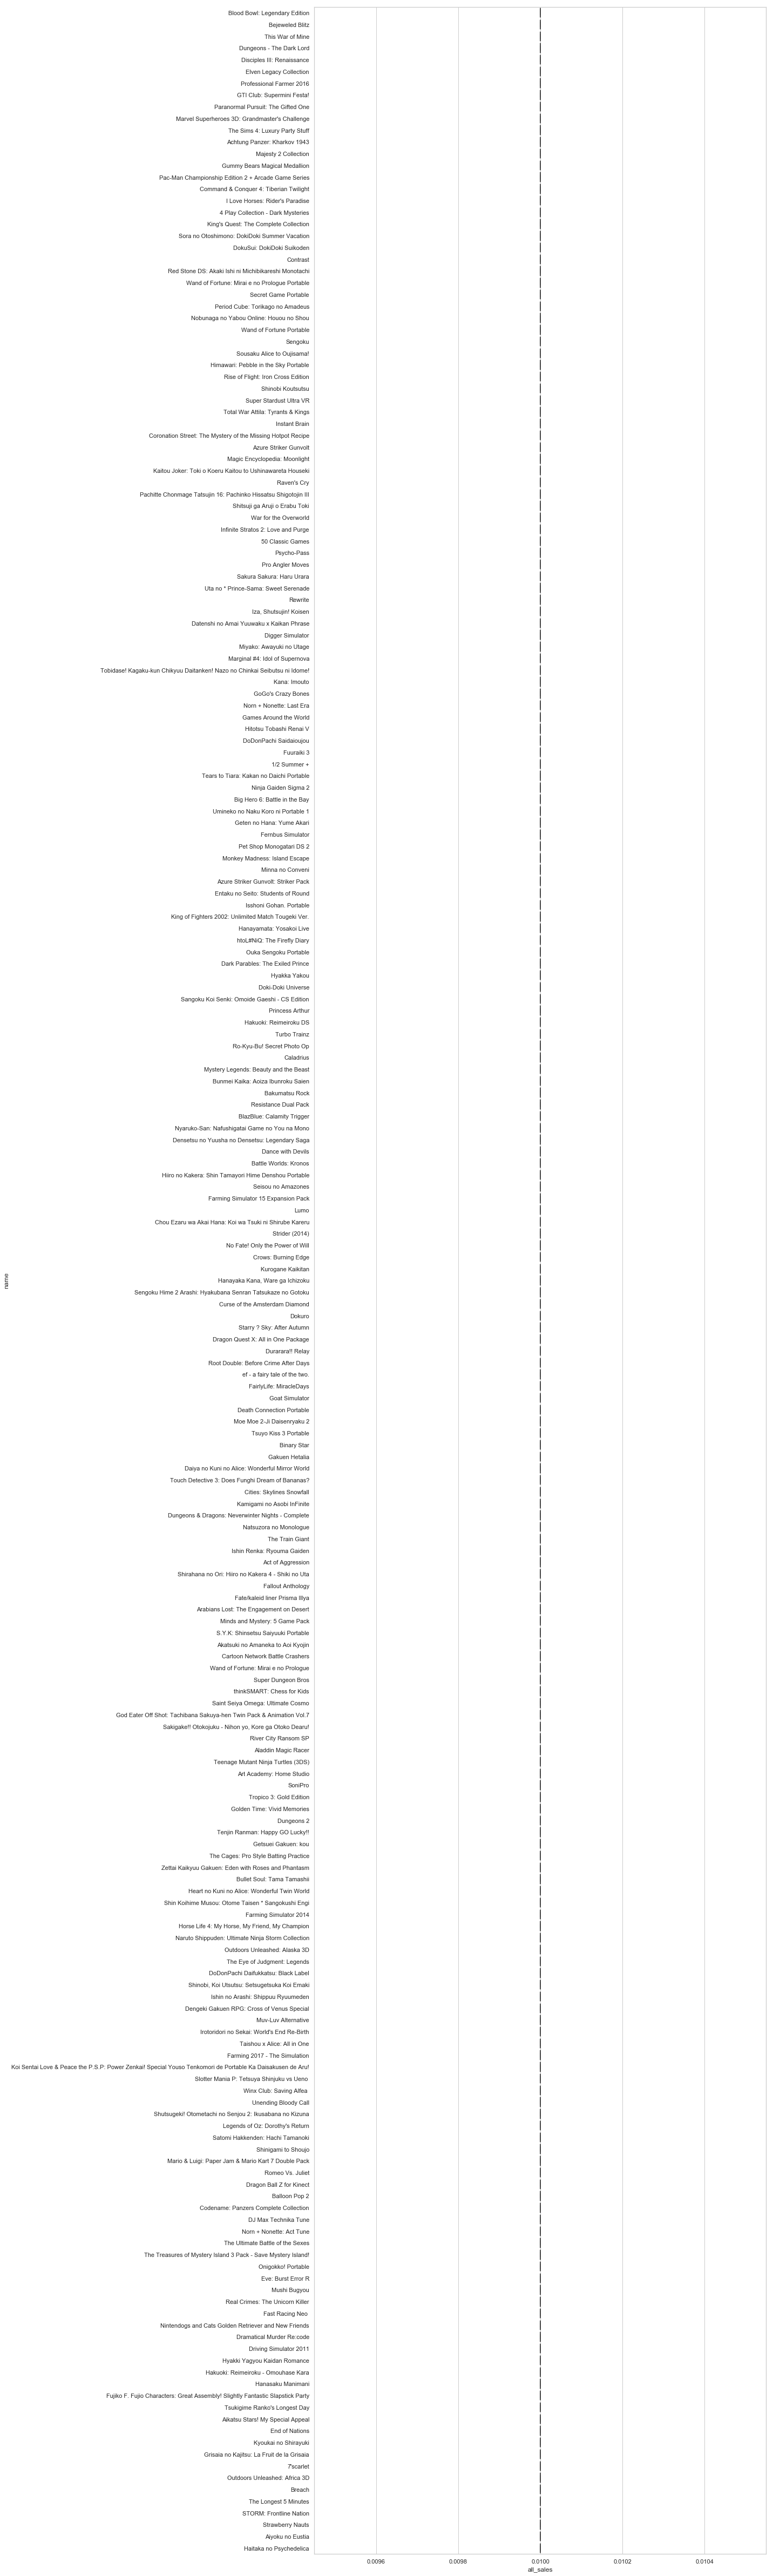

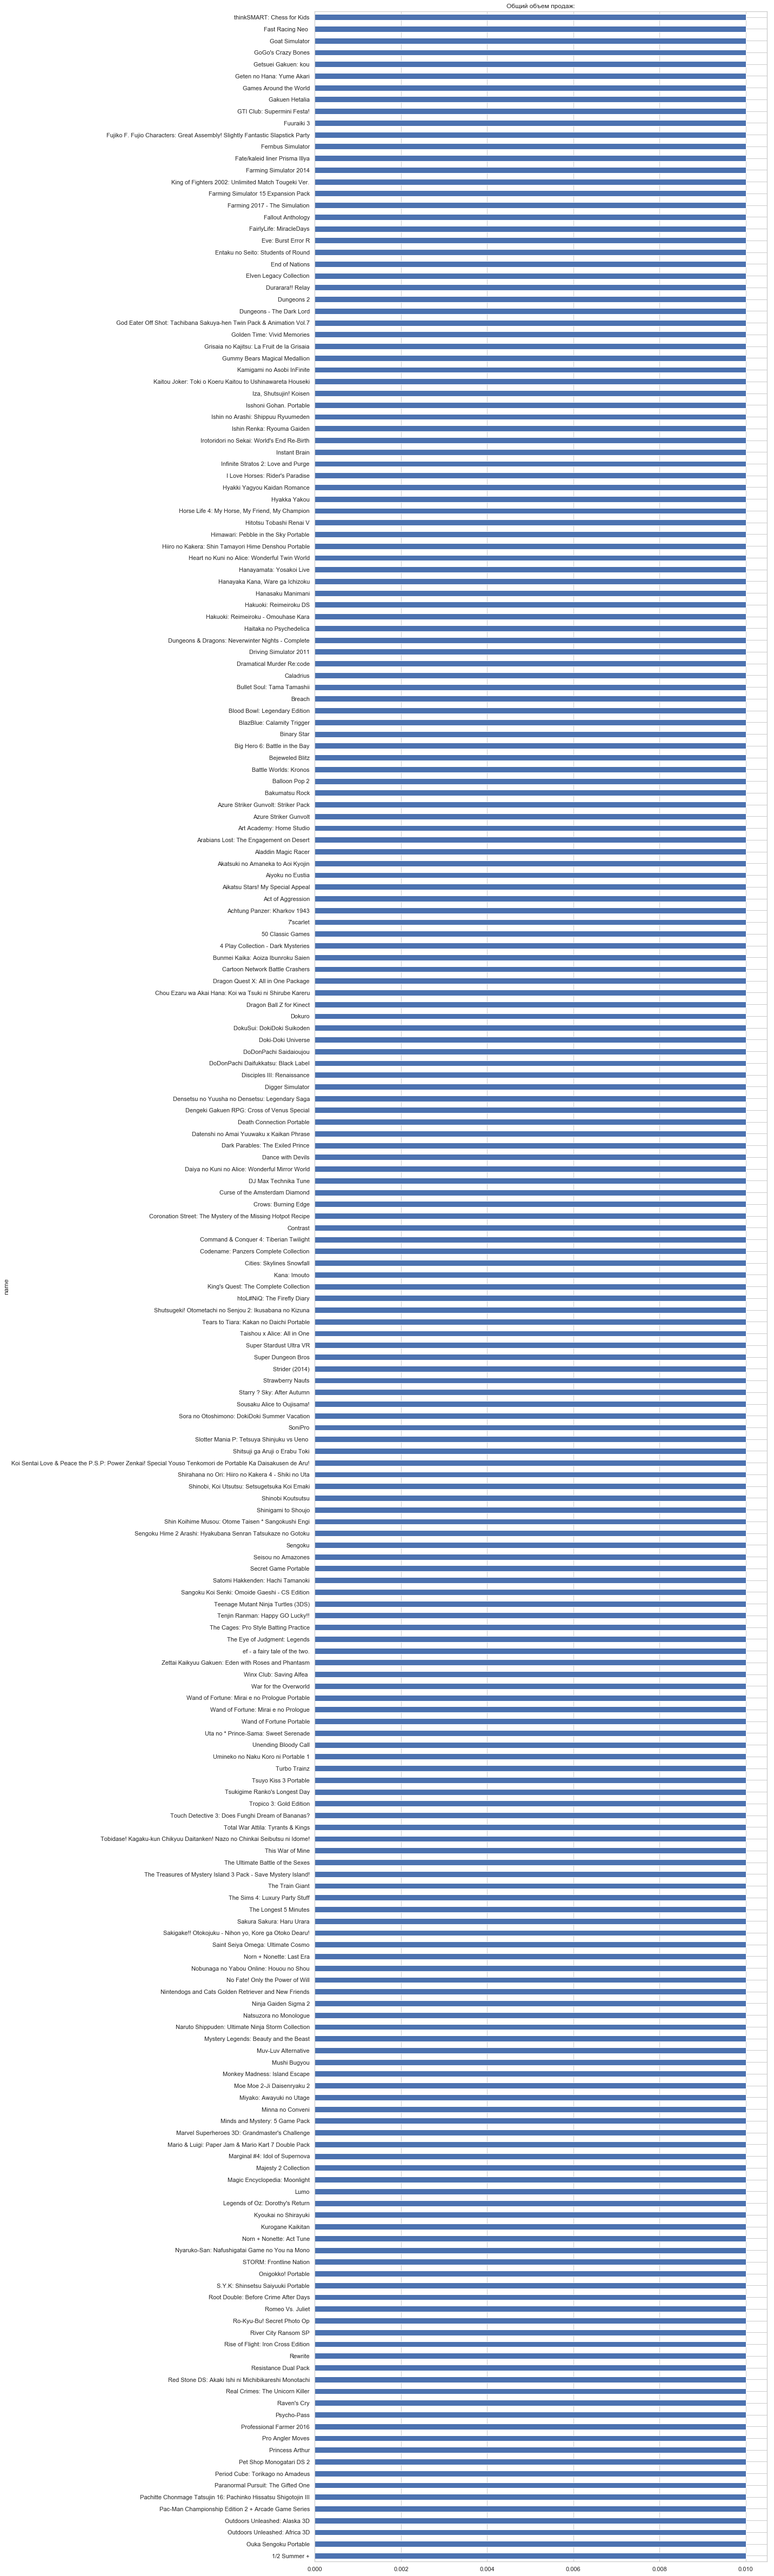

name
thinkSMART: Chess for Kids                             0.01
Turbo Trainz                                           0.01
The Eye of Judgment: Legends                           0.01
ef - a fairy tale of the two.                          0.01
Zettai Kaikyuu Gakuen: Eden with Roses and Phantasm    0.01
                                                       ... 
Achtung Panzer: Kharkov 1943                           0.01
7'scarlet                                              0.01
50 Classic Games                                       0.01
4 Play Collection - Dark Mysteries                     0.01
1/2 Summer +                                           0.01
Name: all_sales, Length: 217, dtype: float64

In [52]:
games_boxplots(sales_max=0.015)

Посмотрим на боксплот конкретной игры:

Игры Minecraft
Количество продаж выбранных игр 6


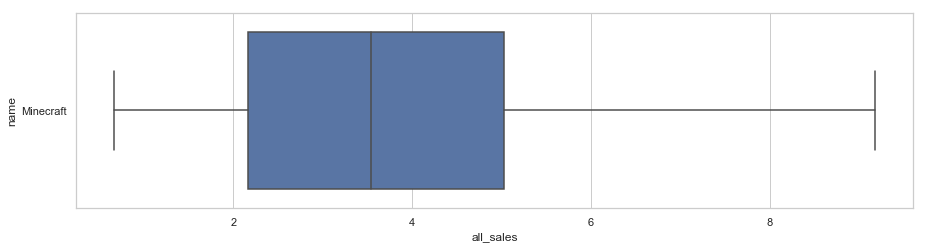

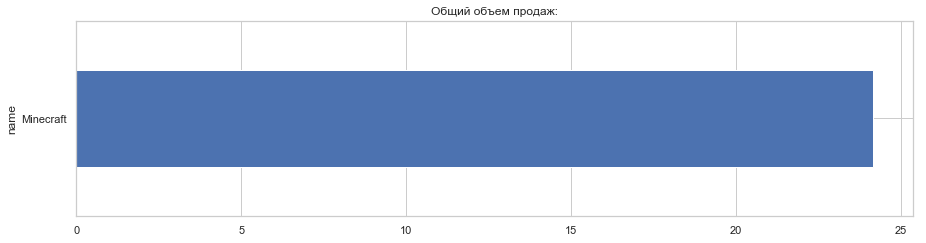

name
Minecraft    24.16
Name: all_sales, dtype: float64

In [53]:
games_boxplots(name='Minecraft')

Посмотрим на боксплоты нескольких игр:

Игры ['Minecraft', 'Just Dance 3', 'Mario Kart 7']
Количество продаж выбранных игр 10


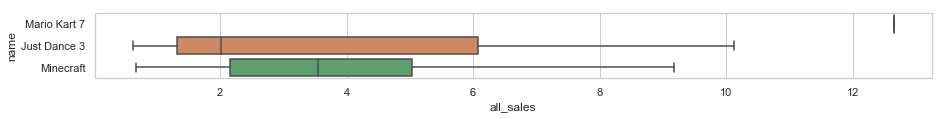

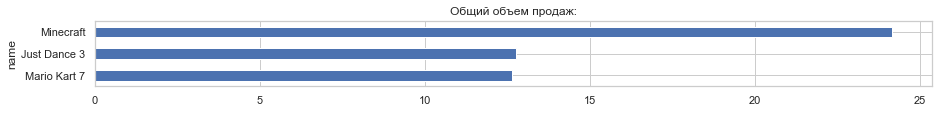

name
Minecraft       24.16
Just Dance 3    12.76
Mario Kart 7    12.65
Name: all_sales, dtype: float64

In [54]:
games_boxplots(name=['Minecraft', 'Just Dance 3', 'Mario Kart 7'])

In [55]:
# функция отображения боксплотов продаж по платформам
def platform_boxplots(platform_in='all'):
    if platform_in == 'all':
        platform = actual_games['platform'].unique()
        title = 'Все платформы'
    else:
        platform = platform_in
        title = f'Платформы {platform}'
    data = actual_games.query('platform in @platform')
    print(f'{title}: глобальные продажи игр в $ млн:')
    height_plot = max((len(platform) / 2), 1)
    f, ax = plt.subplots(figsize=(15, height_plot))
    fig = sns.boxplot(x='all_sales', y='platform', data=data)
    plt.show()

    group_table = data.groupby('platform').sum()['all_sales'].sort_values(ascending=True)
    group_table.plot(kind='barh', use_index=True, figsize=(15, height_plot), title='Общий объем продаж:')
    plt.show()
    display(group_table.sort_values(ascending=False))    

Посмотрим на боксплоты продаж всех платформ:

Все платформы: глобальные продажи игр в $ млн:


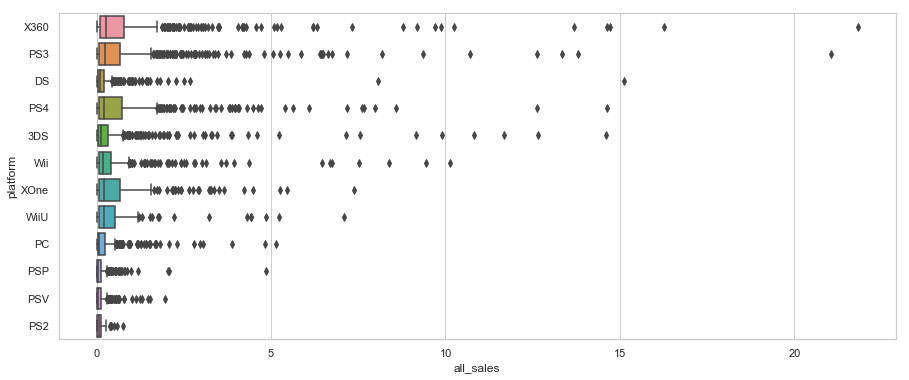

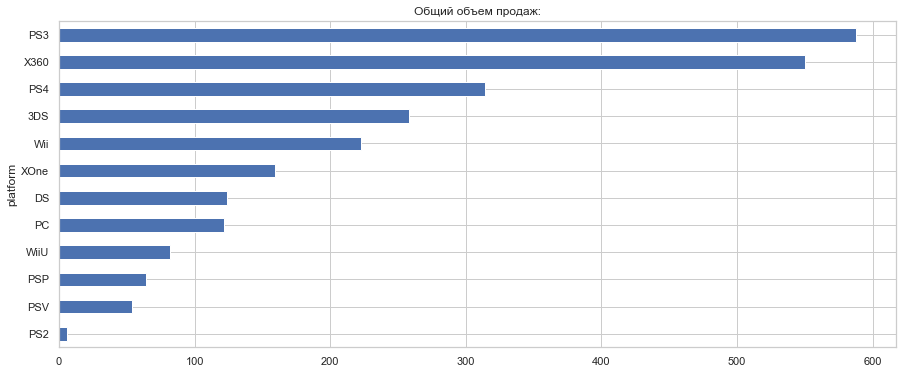

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: all_sales, dtype: float64

In [56]:
platform_boxplots()

Посмотрим на боксплоты продаж нескольких платформ:

Платформы ['PSP', 'PSV']: глобальные продажи игр в $ млн:


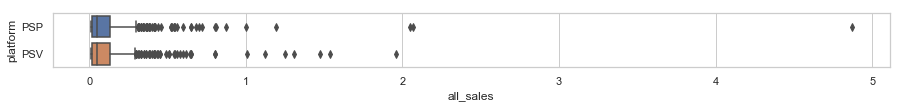

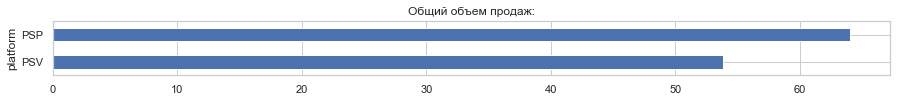

platform
PSP    64.05
PSV    53.81
Name: all_sales, dtype: float64

In [57]:
platform_boxplots(['PSP', 'PSV'])

Посмотрим на боксплоты продаж одной платформы:

Платформы PS2: глобальные продажи игр в $ млн:


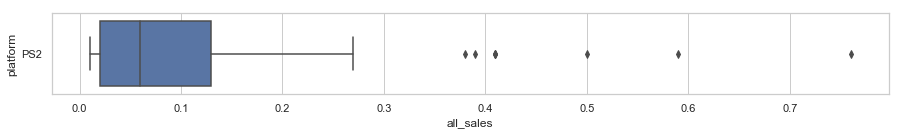

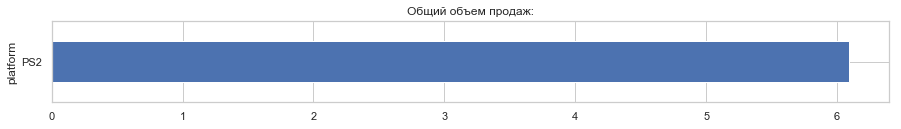

platform
PS2    6.09
Name: all_sales, dtype: float64

In [58]:
platform_boxplots('PS2')

In [59]:
# функция расчета средних показателей за актуальный период
def average_sales(group_column, title='', show_relation=False, platform_in='all', genre_in='all', get_best_relations=0,
                  show_liders=0, count_column=['all_sales'],):
    if show_relation == False and get_best_relations == 0:
        plt.subplots(figsize=figsize)
    for plot_index, column in enumerate(count_column):
        if platform_in == 'all':
            platform = actual_games['platform'].unique()
        else:
            platform = platform_in
        if genre_in == 'all':
            genre = actual_games['genre'].unique()
        else:
            genre = genre_in
        data = actual_games.copy().query('genre in @genre and platform in @platform')
        data[column] = data[column].apply(lambda x: np.nan if x == 0 else x)
        data = (data[[group_column, column]]
                    .groupby(group_column)
                    .agg({'mean', 'median'})
                    [column]
                    .sort_values(by='mean', ascending=False)
                    )
        data['mean'] = data['mean'].round(2)
        if show_liders == 0:
            show_liders = len(data)
        data['relation'] = data['mean'] / data['median']
        data['relation'] = data['relation'].round(2)
        if get_best_relations > 0 and platform_in != 'all':
            result = data.query('relation >= @get_best_relations').reset_index()
            result['platform'] = platform_in
            return result
        if get_best_relations > 0 and genre_in != 'all':
            result = data.query('relation >= @get_best_relations').reset_index()
            result['genre'] = genre_in
            return result
        means = data[['mean', 'median']].head(show_liders)
        (means.T.plot(kind='bar', figsize=figsize, grid=True,
           ax=plt.subplot(1, len(count_column), plot_index + 1),
           title=f'{title}\nв регионе {column}\n за последние {platforms_life_median} лет в млн $\n\n{means}\n')
        )
        if show_relation == True:
            plt.show()
            (data['relation']
             .sort_values(ascending=False).head(show_liders).plot(kind='bar', figsize=figsize, grid=True,
                title=f'Коэффициент прибыльности (превышение среднего над медианой)\n:')
            )
            plt.show()
            display(data.sort_values(by='relation', ascending=False)
                    .rename(columns={'relation': 'прибыльность'}).head(show_liders))
    plt.show()

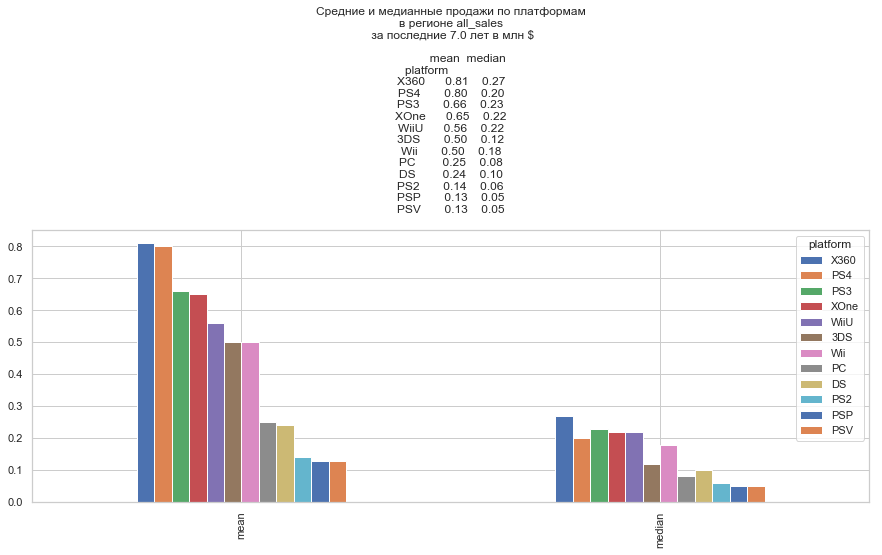

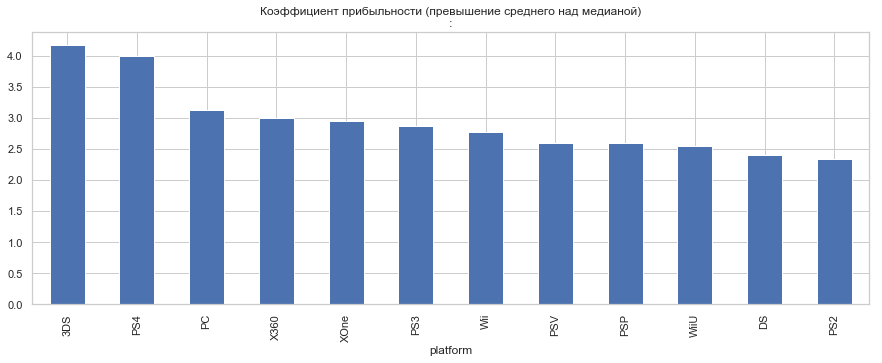

,median,mean,прибыльность
platform,,,
3DS,0.12,0.50,4.17
PS4,0.20,0.80,4.00
PC,0.08,0.25,3.13
X360,0.27,0.81,3.00
XOne,0.22,0.65,2.95
PS3,0.23,0.66,2.87
Wii,0.18,0.50,2.78
PSP,0.05,0.13,2.60
PSV,0.05,0.13,2.60


In [60]:
average_sales(
    group_column='platform',
    title='Средние и медианные продажи по платформам',
    show_relation=True,
)

Разница в продажах игр огромна: от 217 "мусорных" игр с продажами 0.01 млн долларов до GTA5 с  продажами более 56.58 млн  долл 

Средние продажи по разным платформам отличаются в разы. Максимальные средние продажи игр показывают платформы X360 (0.81 млн) и PS4 (0.8 млн), минимальные средние продажи у PSV, PSP с 0.13 $ млн  Выбросы только в верхней части боксплотов по всем платформам говорят о том, что лишь немногие игры "выстреливают" и показывают выдающиеся продажи.

Также интересен показатель скошенности объема продаж вверх, что выражается превышением среднего над медианой. Такой показатель можно назвать "Коэффициент прибыльности". На представленных боксплотах продаж по платформам этот показатель представлен количеством и удаленностью выбросов вверх (вправо). Чем выше такой коэффициент прибыльности, тем весомее выбросы вверх в объемах продаж, тем больше финансовый результат отдельных позиций внутри анализируемой группы. Распределение бюджета на высопродаваемые позиции - это как раз то, что нужно бизнесу. Самый высокий коэффициент прибыльности на глобальном рынке показывают платформы 3DS (4.17) и PS4 (4.00).

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

In [61]:
# функция рассчета корреляций
def correlation(group_column, value, get_correlation=False, corr_column_1=['user_score', 'critic_score'],
                corr_column_2='all_sales'):
    if get_correlation == False:
        plt.subplots(figsize=figsize)
    for plot_index, column in enumerate(corr_column_1):
        data = (actual_games
                [(~actual_games[column].isna()) & (~actual_games[corr_column_2].isna()) &
                 (actual_games[group_column]== value)]
                )   
        corr = data[column].corr(data[corr_column_2])
        if get_correlation == False:
            if 1 >= corr >= -1:
                data.plot(x=column, y=corr_column_2, kind='scatter', alpha=alpha, figsize=figsize,
                          ax=plt.subplot(1, len(corr_column_1), plot_index + 1),
                          title=f'Корреляция между {column} и {corr_column_2}\n для {group_column}'
                          f' {value} составляет {corr:.2f}\n')
            else:
                print(f'Коэффициент корреляции между {column} и {corr_column_2}',
                      f'для {group_column} {value} не рассчитывается из-за отсутствия разброса значений\n')
        if get_correlation == True:
            if not 1 >= corr >= -1:
                corr = 0
            return round(corr, 2)
    plt.show()

Возьмем самую популярную платформу PS4:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


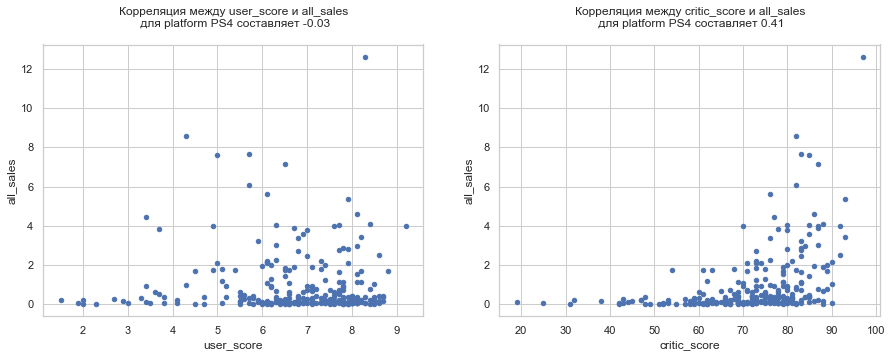

In [62]:
correlation(group_column='platform', value='PS4',)

Возьмем другую популярную платформу X360:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


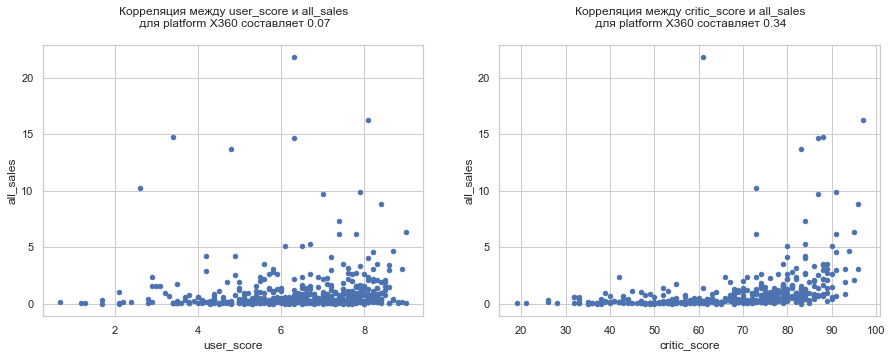

In [63]:
correlation(group_column='platform', value='X360',)

Посмотрим на корреляции между оценками и продажами по каждой платформе:

In [64]:
# функция вывода корреляция по группе
def mass_correlation(group_column, corr_column_1=['user_score', 'critic_score'], corr_column_2='all_sales',):
    plt.subplots(figsize=figsize)
    for plot_index, column in enumerate(corr_column_1):
        data = actual_games.groupby(group_column).min()
        data[group_column] = data.index
        data['correlation'] = (data[group_column]
                         .apply(lambda x: correlation(group_column=group_column, value=x,
                                get_correlation=True, corr_column_1=[column], corr_column_2=corr_column_2))
                        )
        data = data['correlation'].sort_values(ascending=False)
        data.T.plot(kind='bar', figsize=(15,5), grid=True, ax=plt.subplot(1, len(corr_column_1), plot_index + 1),
                    title=f'Корреляции между {column} и {corr_column_2}:\n\n{data}\n')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)


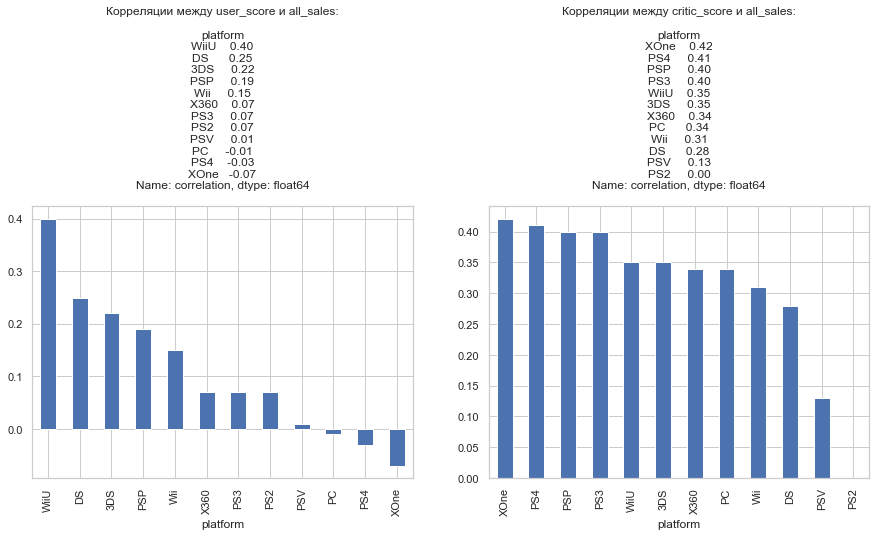

In [65]:
mass_correlation(group_column='platform')

Самая сильная взаимосвязь между оценками пользователей и продажами существует внутри платформы WiiU - слабая корреляция 0.40. По этой платформе можно иметь в виду оценку пользователей, но не опираться на неё. По остальным платформам корреляция очень слабая и слабая (между -0.07 и 0.25) и не представляет интереса.

Между оценками критиков и продажами есть слабые корреляции внутри большинства платформ, от 0.28 до 0.42, и могут представлять некоторый интерес. Корреляции внутри платформы PSV (0.13) очень слабые и не представляют интереса. 

Корреляция между оценками и продажами по платформе PS2 не смогла рассчитаться из-за всего одной игры с оценками. Для рассчета корреляции нужно больше одного значения.

В целом, оценки критиков заслуживают большего внимания, чем оценки пользователей, из-за большей корреляции с глобальными продажами.

### Общее распределение игр по жанрам

In [66]:
# функция вывода долей
def proportion(title, group_column='genre', aggregation=np.ma.count, show_liders=0, count_column=['all_sales']):
    plt.subplots(figsize=figsize)
    for plot_index, column in enumerate(count_column):
        data = (actual_games
            .groupby(group_column)
            .agg(aggregation)
            .sort_values(by=column, ascending=False)
        )
        if show_liders > 0:
            data.reset_index(inplace=True)
            data_liders = data.iloc[0:show_liders]
            data_losers = data.iloc[show_liders:].agg('sum')
            data = data_liders.append(data_losers, ignore_index=True)
            data.at[5, group_column] = 'Others'
            data.set_index(group_column, inplace=True)
        total_games = data[column].sum()
        data['part'] = data[column].apply(lambda x: round(x / total_games * 100, 1))
        parts = data['part']
        data[column].plot(kind='pie', title=f'{title},\nв регионе {column},\nдоли в процентах\n\n{parts}\n',
                          ax=plt.subplot(1, len(count_column), plot_index + 1),)
    plt.show()        

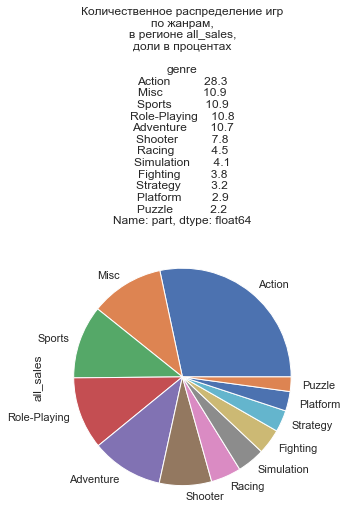

In [67]:
proportion(title='Количественное распределение игр\nпо жанрам')

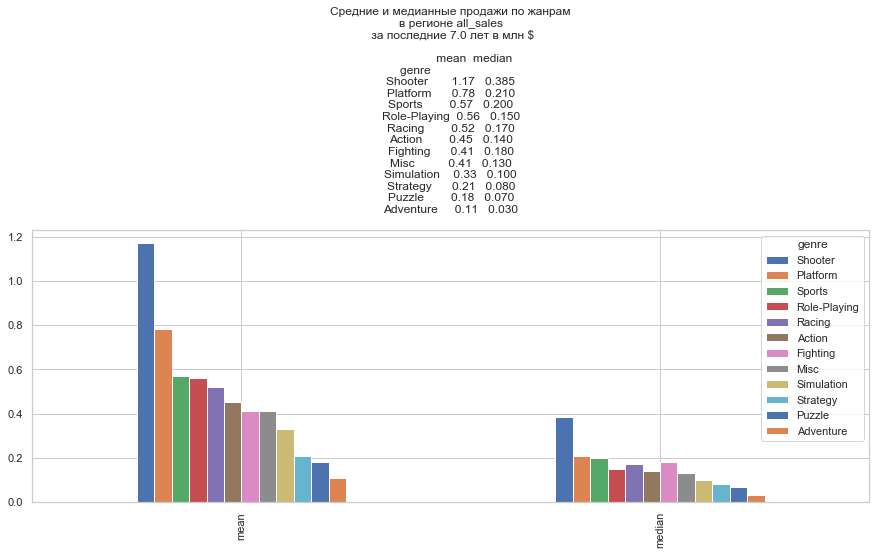

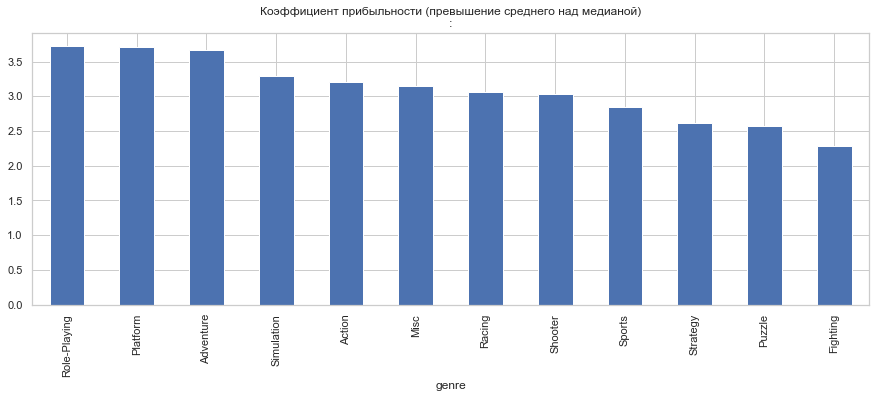

,median,mean,прибыльность
genre,,,
Role-Playing,0.150,0.56,3.73
Platform,0.210,0.78,3.71
Adventure,0.030,0.11,3.67
Simulation,0.100,0.33,3.30
Action,0.140,0.45,3.21
Misc,0.130,0.41,3.15
Racing,0.170,0.52,3.06
Shooter,0.385,1.17,3.04
Sports,0.200,0.57,2.85


In [68]:
average_sales(
    group_column='genre',
    title='Средние и медианные продажи по жанрам',
    show_relation=True,
)

На первом месте по количеству игр находится жанр Action с долей рынка 28.3%, на втором месте находятся жанры Sports, Misc, Role-Playing и Adventure с долями от 10.7% до 10.9%, на третьем месте находится жанр Shooter с долей рынка 7.8%. Остальные жанры имеют доли рынка от 2.2% до 4.5%.

Самые высокие показатели по средним продажам - это Shooter (1.17 млн долларов) и Platform (0.78 млн долларов), самые низкие - это Adventure (0.11 $ млн).

Самый высокий коэффициент прибыльности (превышение среднего над медианой) имеют жанры Role-Playing (3.73), Platform (3.71) и Adventure (3.67) . Но это не предел.

### Дополнительная миссия

Найдем сочетания жанров и платформ с самыми высокими коэффициентами прибыльности (превышение среднего над медианой) на глобальном рынке:

In [69]:
the_best_relations = 5
result = pd.DataFrame()
for platform in actual_games['platform'].unique():
    data = average_sales(
        group_column='genre',
        platform_in=platform,
        get_best_relations=the_best_relations,
    )
    if len(data) > 0:
        result = pd.concat([result, data], axis=0, sort=False)
if len(result) > 0:
    result = result.sort_values(by='relation', ascending=False).reset_index(drop=True)
    
print(f'Жанры и платформы с коэффициентом прибыльности (превышение среднего над медианой) выше {the_best_relations}')
display(result)

Жанры и платформы с коэффициентом прибыльности (превышение среднего над медианой) выше 5


,genre,median,mean,relation,platform
0,Racing,0.210,1.49,7.10,3DS
1,Role-Playing,0.130,0.92,7.08,DS
2,Fighting,0.190,1.25,6.58,WiiU
3,Fighting,0.115,0.75,6.52,3DS
4,Simulation,0.160,0.93,5.81,3DS
5,Strategy,0.050,0.28,5.60,PC
6,Adventure,0.040,0.22,5.50,X360
7,Puzzle,0.060,0.33,5.50,WiiU
8,Misc,0.075,0.41,5.47,PS4
9,Platform,0.220,1.16,5.27,3DS


Самые высокие коэффициенты прибыльности (превышение средних продаж над медианными) на глобальном рынке у жанра Racing в платформе 3DS (7.10) и у жанра Role-Playing в платформе DS (7.08). Это означает, что в этих группах есть высокопродаваемые позиции, выбивающиеся из общей массы.

### Шаг 3. Вывод

Максимальное количество игр выпущено в 2009 году (1476), минимальное - в самом начале игровой индустрии в 1980 году (9). Расцвет игровой индустрии пришелся на 2008-2009 годы, после чего производство игр стало снижаться. Похоже, это связано с общемировым экономическим кризисом, начавшемся в 2008 году.

Для анализа текущей рыночной обстановки важны актуальные данные. Актуальными можно считать данные за последние годы, включающие средний срок жизни игровой платформы.

Построено распределение продаж по годам для топ-3 платформ с максимальными суммарными продажами.

Самая продавая платформа за все время - PS2. Появившись в 2000 году, она сразу выстрелила и за 2 года к 2002 году достигла своего первого пика продаж в 205.38 долларов млн  Еще через 2 года к 2004 году был достигнут еще больший пик продаж в 211.81 $ млн  Продажи сократились практически до нуля в 2011 году. Жизненный цикл растянулся на 10 лет.

Платформа Wii находится на четвертом месте по объему продаж и на первом месте по пику продаж за год: в 2009 году продажи составили 223.30 $ млн 

На текущий момент выделяется только одна платформа по объему продаж - PS4. Остальные актуальные платформы практически завершили свой жизненный цикл.

Характерный срок существования платформы 7 лет.

В актуальном периоде за текущий и предыдущий годы лидируют 3 платформы по объемам продаж: PS4 (69.25 в 2016г. и 118.90 в 2015г), XOne (26.15 в 2016г. и 60.14 в 2015г.), 3DS (27.78 в 2015г. и 15.14 в 2016г.). В 2016 году продажи по всем платформам упали, в 2015 году продажи выросли только по двум лидерам: PS4 и XOne. Потенциально прибыльные платформы есть только среди лидеров продаж: PS4, XOne и 3DS.

Разница в продажах игр огромна: от 217 "мусорных" игр с продажами 0.01 млн долларов до GTA5 с продажами более 56.58 млн  долл 

Средние продажи по разным платформам отличаются в разы. Максимальные средние продажи игр показывают платформы X360 (0.81 млн) и PS4 (0.8 млн), минимальные средние продажи у PSV, PSP с 0.13 $ млн  Выбросы только в верхней части боксплотов по всем платформам говорят о том, что лишь немногие игры "выстреливают" и показывают выдающиеся продажи.

Также интересен показатель скошенности объема продаж вверх, что выражается превышением среднего над медианой. Такой показатель можно назвать "Коэффициент прибыльности". На представленных боксплотах продаж по платформам этот показатель представлен количеством и удаленностью выбросов вверх (вправо). Чем выше такой коэффициент прибыльности, тем весомее выбросы вверх в объемах продаж, тем больше финансовый результат отдельных позиций внутри анализируемой группы. Распределение бюджета на высопродаваемые позиции - это как раз то, что нужно бизнесу. Самый высокий коэффициент прибыльности на глобальном рынке показывают платформы 3DS (4.17) и PS4 (4.00).

Самая сильная взаимосвязь между оценками пользователей и продажами существует внутри платформы WiiU - слабая корреляция 0.39. По этой платформе можно иметь в виду оценку пользователей, но не опираться на неё. По остальным платформам корреляция очень слабая и слабая (между -0.09 и 0.23) и не представляет интереса.

Между оценками критиков и продажами есть слабые корреляции внутри большинства платформ, от 0.25 до 0.41, и могут представлять некоторый интерес. Корреляции внутри платформ PSV (0.13) и DS (0.17) очень слабые и не представляют интереса. 

Корреляция между оценками и продажами по платформе PS2 не смогла рассчитаться из-за всего одной игры с оценками. Для рассчета корреляции нужно больше одного значения.

На первом месте по количеству игр находится жанр Action с долей рынка 28.3%, на втором месте находятся жанры Sports, Misc, Role-Playing и Adventure с долями от 10.7% до 10.9%, на третьем месте находится жанр Shooter с долей рынка 7.8%. Остальные жанры имеют доли рынка от 2.2% до 4.5%.

Самые высокие показатели по средним продажам - это Shooter (1.17 млн долларов) и Platform (0.78 млн долларов), самые низкие - это Adventure (0.11 $ млн).

Самый высокий коэффициент прибыльности (превышение среднего над медианой) имеют жанры Role-Playing (3.73), Platform (3.71) и Adventure (3.67) . Но это не предел.

Самые высокие коэффициенты прибыльности (превышение средних продаж над медианными) на глобальном рынке у жанра Racing в платформе 3DS (7.10) и у жанра Role-Playing в платформе DS (7.08). Это означает, что в этих группах есть высокопродаваемые позиции, выбивающиеся из общей массы.

## Шаг 4. Портрет пользователя каждого региона

Как определить популярность платформы? Лучший критерий - количество проданного товара в штуках. Этого нет в предоставленном наборе данных. Косвенные критерии - средние и медианные продажи, доли в объемах продаж, превышение средних продаж над медианными, оценки пользователей.

In [70]:
# функция показа средних продаж и объемов продаж самых популярных платформ и жанров в регионе
def top_5():
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    show_liders=5
    title = f'Топ-5'
    for group_column in ['platform', 'genre', 'rating']:
        average_sales(
            group_column=group_column,
            title=f'{title} {group_column}\nпо средним и медианным продажам',
            show_liders=show_liders,
            count_column=regions,
            )
        print('\n\n')
        proportion(title=f'{title} {group_column}\nпо объему продаж',
                   group_column=group_column,
                   aggregation=np.sum,
                   show_liders=show_liders,
                   count_column=regions,
                  )
        print('\n\n')

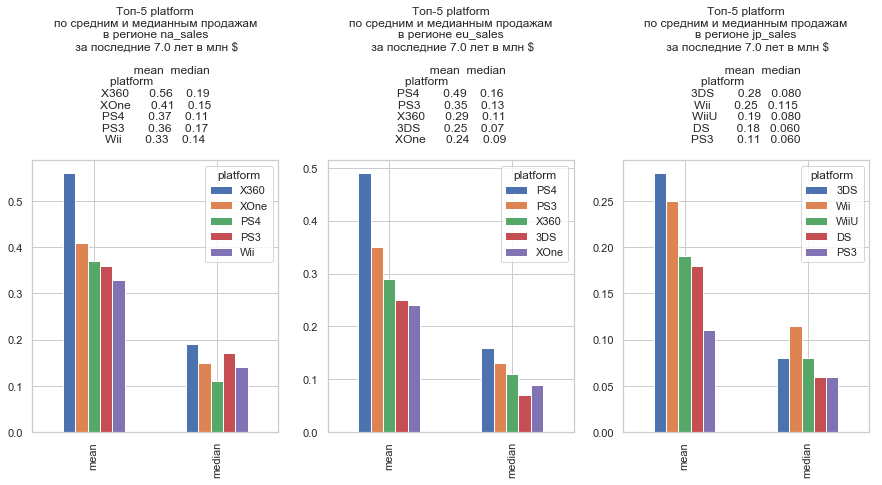

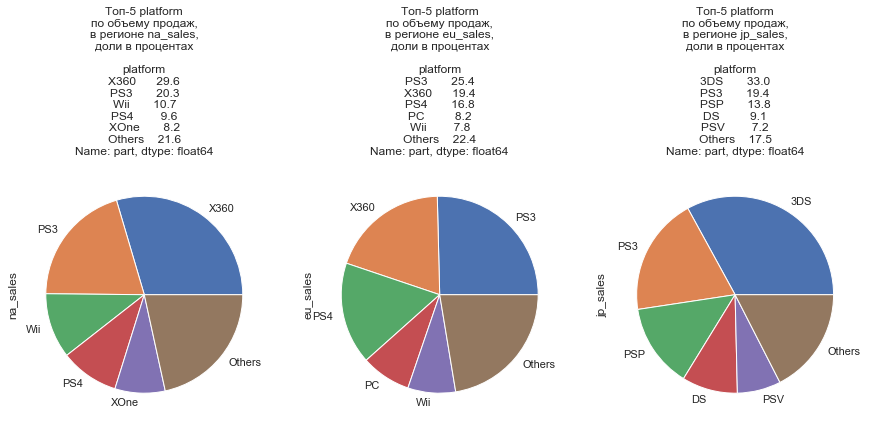

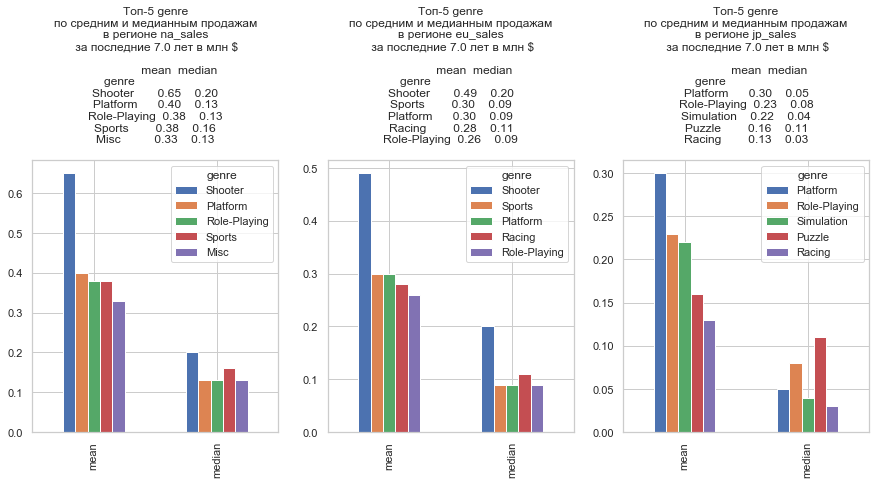

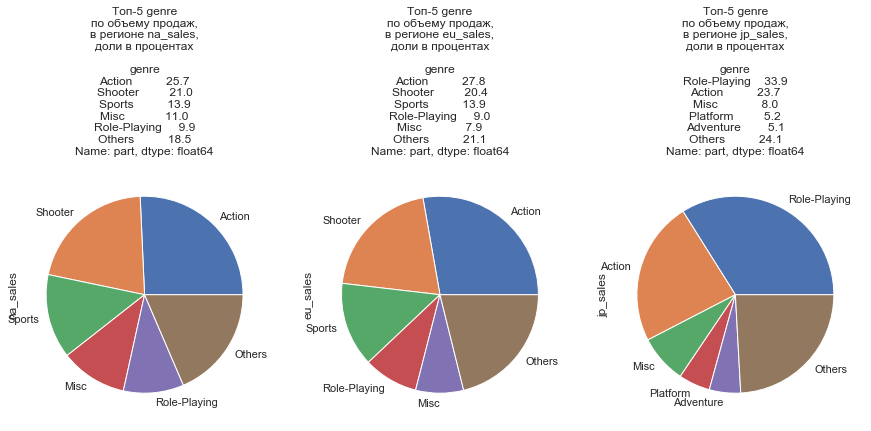

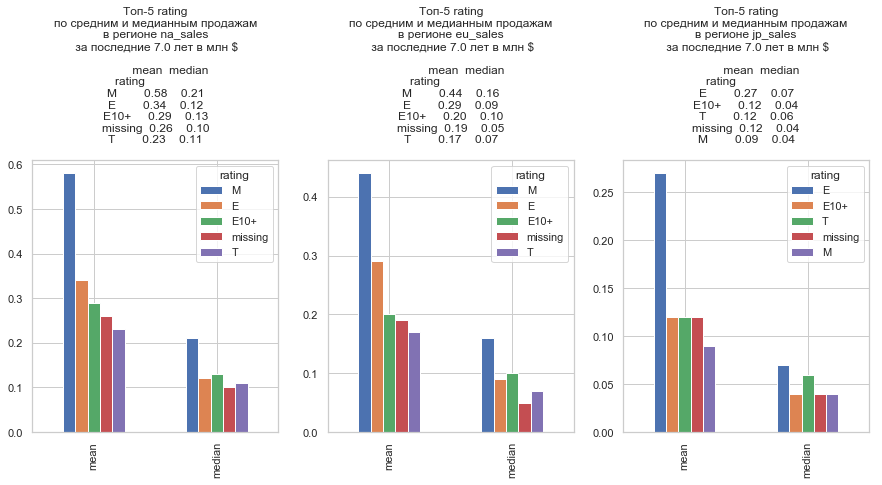

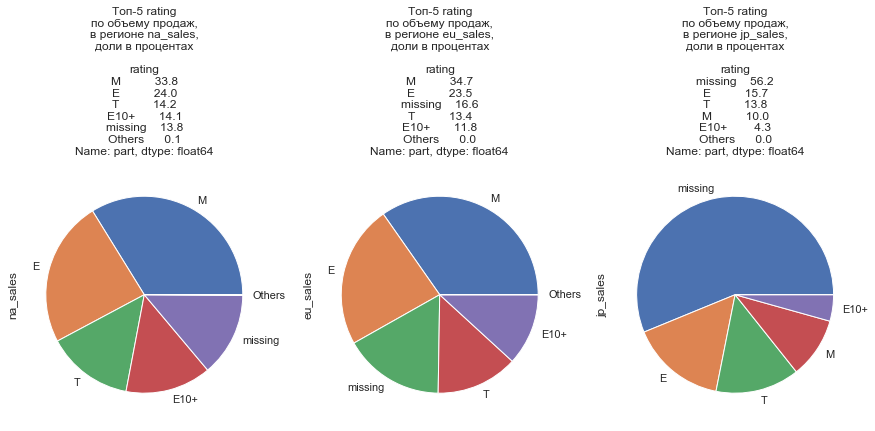

In [71]:
top_5()

### Шаг 4. Вывод

Топ-5 платформ:

Самые популярные платформы, исходя из средних продаж, по убыванию: Северная Америка (X360, XOne, PS4, PS3, Wii), Европа (PS4, PS3, X360, 3DS, XOne), Япония (3DS, Wii, WiiU, DS, PS3). В каждом из регионов в пятерку лидеров входит PS3. Особенность в Японии - популярность WiiU и DS.

Самые популярные платформы, исходя из коэффициента прибыльности, по убыванию: Северная Америка (PS4, X360, XOne, 3DS, PC), Европа (3DS, PS4, DS, Wii, PS3), Япония (3DS, DS, WiiU, PSP, Wii). В каждом из регионов в пятерку лидеров входит 3DS. Особенность в Северной Америке - популярность X360, XOne и PC. Особенность в Европе - популярность PS3. Особенность в Японии - популярность WiiU и PSP.

Самые популярные платформы, исходя из объемов продаж, по убыванию: Северная Америка (X360, PS3, Wii, PS4, XOne), Европа (PS3, X360, PS4, PC, Wii), Япония (3DS, PS3, PSP, DS, PSV). В каждом из регионов в пятерку лидеров входит PS3. Особенность в Северной Америке - популярность XOne. Особенность в Европе - популярность PC. Особенность в Японии - популярность 3DS, PSP, DS и PSV.

Топ-5 жанров:

Самые популярные жанры, исходя из средних продаж, по убыванию: Северная Америка (Shooter, Platform, Role-Playing, Sports, Misc), Европа (Shooter, Sports, Platform, Racing, Role-Playing), Япония (Platform, Role-Playing, Simulation, Puzzle, Racing). В каждом из регионов в пятерку лидеров входят Platform и Role-Playing. Особенность в Северной Америке - популярность Misc. Особенность в Японии - популярность Simulation и Puzzle.

Самые популярные платформы, исходя из коэффициента прибыльности, по убыванию: Северная Америка (Shooter, Platform, Role-Playing, Racing, Misc), Европа (Sports, Platform, Simulation, Misc, Role-Playing), Япония (Platform, Simulation, Racing, Role-Playing, Shooter). В каждом из регионов в пятерку лидеров входят Platform и Role-Playing. Особенность в Европе - популярность Sports.

Самые популярные платформы, исходя из объемов продаж, по убыванию: Северная Америка (Action, Shooter, Sports, Misc, Role-Playing), Европа (Action, Shooter, Sports, Role-Playing, Misc), Япония (Role-Playing, Action, Misc, Platform, Adventure). В каждом из регионов в пятерку лидеров входит Action, Misc и Role-Playing. Особенность в Японии - популярность Platform и Adventure.

Рейтинги:

Самые популярные рейтинги игр, исходя из объемов продаж, по убыванию: Северная Америка (M, E, T, E10+, missing), Европа (M, E, missing, T, E10+), Япония (missing, E, T, M, E10+). В каждом из регионов одинаково продаются игры с рейтингом T. В Северной Америке и Европе примерно одинаковые объемы придаж по рейтингам. В Японии структура объема продаж по рейтингам кардинально отличается от структуры в Америке и Европе, не считая игры с рейтингом T. Примечание: "missing" - это отсутствующие рейтинги в данных.

## Шаг 5. Проверка гипотез

В предоставленных данных нет колонки "пользовательские рейтинги". Есть колонки "оценки пользователей" и "рейтинг от организации ESRB". Будем считать, что "пользовательские рейтинги" - это "оценки пользователей".

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind. Параметр equal_var зададим True, так как дисперсии выборок не должны существенно различаться, это однородные данные.. Пороговое значение alpha выставим стандартное 0.05.

In [72]:
# функция проверки гипотез
def check_hypothesis(column, query_1, query_2, null_hypothesis, alt_hypothesis):
    # создание словаря со списками платежей для каждого запроса
    check_list = {}
    table = actual_games.copy()
    for query in [query_1, query_2]:
        check_list[query] = []
        (table.query(query)
         [column]
         .apply(lambda x: check_list[query].append(x) if x >= 0 else 0)
        )
        print(f'Запрос ({query}) для {column}: количество записей {len(check_list[query])},'
             f'среднее {np.mean(check_list[query]):.4f}, дисперсия {np.var(check_list[query]):.4f}')
    alpha = 0.05
    results = st.ttest_ind(check_list[query_1], check_list[query_2], equal_var=True)
    print(f'p-value: {results.pvalue:.2f}')
    print(f'Нулевая гипотеза - {null_hypothesis}')
    print(f'Альтернативная гипотеза - {alt_hypothesis}')
    if (results.pvalue > alpha):
        print('Поддерживаем нулевую гипотезу')
    else:
        print('Поддерживаем альтернативную гипотезу')

### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"¶

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Сформулируем нулевую гипотезу - средние оценки пользователей платформ Xbox One и PC одинаковые. Исходя из нулевой гипотезы, сформулируем альтернативную гипотезу - средние оценки пользователей платформ Xbox One и PC различаются. Проверим дисперсии оценок пользователей для каждой платформы:

In [73]:
# проверка гипотезы
check_hypothesis(
    column='user_score',
    query_1 = 'platform == "XOne"',
    query_2 = 'platform == "PC"',
    null_hypothesis = 'средние оценки пользователей платформ Xbox One и PC одинаковые',
    alt_hypothesis = 'средние оценки пользователей платформ Xbox One и PC разные',
)

Запрос (platform == "XOne") для user_score: количество записей 182,среднее 6.5214, дисперсия 1.8965
Запрос (platform == "PC") для user_score: количество записей 374,среднее 6.5182, дисперсия 2.4439
p-value: 0.98
Нулевая гипотеза - средние оценки пользователей платформ Xbox One и PC одинаковые
Альтернативная гипотеза - средние оценки пользователей платформ Xbox One и PC разные
Поддерживаем нулевую гипотезу


### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"¶

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Сформулируем нулевую гипотезу - средние оценки пользователей жанров Action и Sports одинаковые. Исходя из нулевой гипотезы, сформулируем альтернативную гипотезу - средние оценки пользователей жанров Action и Sports разные. Проверим дисперсии оценок пользователей для каждой платформы:

In [74]:
# проверка гипотезы
check_hypothesis(
    column='user_score',
    query_1 = 'genre == "Action"',
    query_2 = 'genre == "Sports"',
    null_hypothesis = 'средние оценки пользователей жанров Action и Sports одинаковые',
    alt_hypothesis = 'средние оценки пользователей жанров Action и Sports разные',
)

Запрос (genre == "Action") для user_score: количество записей 779,среднее 6.7819, дисперсия 1.8478
Запрос (genre == "Sports") для user_score: количество записей 315,среднее 5.9016, дисперсия 2.8266
p-value: 0.00
Нулевая гипотеза - средние оценки пользователей жанров Action и Sports одинаковые
Альтернативная гипотеза - средние оценки пользователей жанров Action и Sports разные
Поддерживаем альтернативную гипотезу


### Шаг 5. Вывод

Поддерживаем обе гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные".

## Шаг 6. Общий вывод

### Шаг 1

В представленных данных есть пропуски везде, кроме колонок с жанром и продажами. Причины пропусков будут понятнее при детальном изучении. Типы данных нужно оптимизировать: год релиза не имеет нужды в дробной части, поэтому нужно преобразовать в целочисленный тип; оценки критиков содержат целые числа, поэтому также должны иметь целочисленный тип; оценки пользователей содержат дробные числа, поэтому должны иметь тип float. Имена колонок содержат заглавные буквы, которые нужно преобразовать в строчные для удобства работы.

### Шаг 2

Названия колонок преобразованы к нижнему регистру.

Дубликаты отсутствуют.

269 записей с пропусками в годах выпуска удалены. Тип данных годов выпуска преобразован в int.

2376 значения 'tbd' в оценках пользователей преобразованы в NaN. Тип данных оценок пользователей преобразован во float.

Между оценками критиков и другими колонками нет сильных корреляций. Чтобы не искажать данные, тип данных оценок критиков оставлен float. Добавлена колонка с суммой продаж по всем регионам.

2 пропуска одновременно в названии и жанре удалены.

Пропуски в оценках пользователей в 54% записей, в 87% случаях пропуски одновременно присутствуют и в оценках критиков. Медиана 7.5. Пропуски нельзя заполнить нулями, так как это исказит данные. Между оценками пользователей и другими колонками нет сильных корреляций. Чтобы не искажать данные, пропуски оставлены без изменений.

6676 пропусков в рейтинге заполнены значением 'missing'.

### Шаг 3

Максимальное количество игр выпущено в 2009 году (1476), минимальное - в самом начале игровой индустрии в 1980 году (9). Расцвет игровой индустрии пришелся на 2008-2009 годы, после чего производство игр стало снижаться. Похоже, это связано с общемировым экономическим кризисом, начавшемся в 2008 году.

Для анализа текущей рыночной обстановки важны актуальные данные. Актуальными можно считать данные за последние годы, включающие средний срок жизни игровой платформы.

Построено распределение продаж по годам для топ-3 платформ с максимальными суммарными продажами.

Самая продавая платформа за все время - PS2. Появившись в 2000 году, она сразу выстрелила и за 2 года к 2002 году достигла своего первого пика продаж в 205.38 долларов млн  Еще через 2 года к 2004 году был достигнут еще больший пик продаж в 211.81 $ млн  Продажи сократились практически до нуля в 2011 году. Жизненный цикл растянулся на 10 лет.

Платформа Wii находится на четвертом месте по объему продаж и на первом месте по пику продаж за год: в 2009 году продажи составили 223.30 $ млн 

На текущий момент выделяется только одна платформа по объему продаж - PS4. Остальные актуальные платформы практически завершили свой жизненный цикл.

Характерный срок существования платформы 7 лет.

В актуальном периоде за текущий и предыдущий годы лидируют 3 платформы по объемам продаж: PS4 (69.25 в 2016г. и 118.90 в 2015г), XOne (26.15 в 2016г. и 60.14 в 2015г.), 3DS (27.78 в 2015г. и 15.14 в 2016г.). В 2016 году продажи по всем платформам упали, в 2015 году продажи выросли только по двум лидерам: PS4 и XOne. Потенциально прибыльные платформы есть только среди лидеров продаж: PS4, XOne и 3DS.

Разница в продажах игр огромна: от 217 "мусорных" игр с продажами 0.01 млн долларов до GTA5 с продажами более 56.58 млн  долл 

Средние продажи по разным платформам отличаются в разы. Максимальные средние продажи игр показывают платформы X360 (0.81 млн) и PS4 (0.8 млн), минимальные средние продажи у PSV, PSP с 0.13 $ млн  Выбросы только в верхней части боксплотов по всем платформам говорят о том, что лишь немногие игры "выстреливают" и показывают выдающиеся продажи.

Также интересен показатель скошенности объема продаж вверх, что выражается превышением среднего над медианой. Такой показатель можно назвать "Коэффициент прибыльности". На представленных боксплотах продаж по платформам этот показатель представлен количеством и удаленностью выбросов вверх (вправо). Чем выше такой коэффициент прибыльности, тем весомее выбросы вверх в объемах продаж, тем больше финансовый результат отдельных позиций внутри анализируемой группы. Распределение бюджета на высопродаваемые позиции - это как раз то, что нужно бизнесу. Самый высокий коэффициент прибыльности на глобальном рынке показывают платформы 3DS (4.17) и PS4 (4.00).

Самая сильная взаимосвязь между оценками пользователей и продажами существует внутри платформы WiiU - слабая корреляция 0.39. По этой платформе можно иметь в виду оценку пользователей, но не опираться на неё. По остальным платформам корреляция очень слабая и слабая (между -0.09 и 0.23) и не представляет интереса.

Между оценками критиков и продажами есть слабые корреляции внутри большинства платформ, от 0.25 до 0.41, и могут представлять некоторый интерес. Корреляции внутри платформ PSV (0.13) и DS (0.17) очень слабые и не представляют интереса. 

Корреляция между оценками и продажами по платформе PS2 не смогла рассчитаться из-за всего одной игры с оценками. Для рассчета корреляции нужно больше одного значения.

На первом месте по количеству игр находится жанр Action с долей рынка 28.3%, на втором месте находятся жанры Sports, Misc, Role-Playing и Adventure с долями от 10.7% до 10.9%, на третьем месте находится жанр Shooter с долей рынка 7.8%. Остальные жанры имеют доли рынка от 2.2% до 4.5%.

Самые высокие показатели по средним продажам - это Shooter (1.17 млн долларов) и Platform (0.78 млн долларов), самые низкие - это Adventure (0.11 $ млн).

Самый высокий коэффициент прибыльности (превышение среднего над медианой) имеют жанры Role-Playing (3.73), Platform (3.71) и Adventure (3.67) . Но это не предел.

Самые высокие коэффициенты прибыльности (превышение средних продаж над медианными) на глобальном рынке у жанра Racing в платформе 3DS (7.10) и у жанра Role-Playing в платформе DS (7.08). Это означает, что в этих группах есть высокопродаваемые позиции, выбивающиеся из общей массы.

### Шаг 4

Топ-5 платформ:

Самые популярные платформы, исходя из средних продаж, по убыванию: Северная Америка (X360, XOne, PS4, PS3, Wii), Европа (PS4, PS3, X360, 3DS, XOne), Япония (3DS, Wii, WiiU, DS, PS3). В каждом из регионов в пятерку лидеров входит PS3. Особенность в Японии - популярность WiiU и DS.

Самые популярные платформы, исходя из коэффициента прибыльности, по убыванию: Северная Америка (PS4, X360, XOne, 3DS, PC), Европа (3DS, PS4, DS, Wii, PS3), Япония (3DS, DS, WiiU, PSP, Wii). В каждом из регионов в пятерку лидеров входит 3DS. Особенность в Северной Америке - популярность X360, XOne и PC. Особенность в Европе - популярность PS3. Особенность в Японии - популярность WiiU и PSP.

Самые популярные платформы, исходя из объемов продаж, по убыванию: Северная Америка (X360, PS3, Wii, PS4, XOne), Европа (PS3, X360, PS4, PC, Wii), Япония (3DS, PS3, PSP, DS, PSV). В каждом из регионов в пятерку лидеров входит PS3. Особенность в Северной Америке - популярность XOne. Особенность в Европе - популярность PC. Особенность в Японии - популярность 3DS, PSP, DS и PSV.

Топ-5 жанров:

Самые популярные жанры, исходя из средних продаж, по убыванию: Северная Америка (Shooter, Platform, Role-Playing, Sports, Misc), Европа (Shooter, Sports, Platform, Racing, Role-Playing), Япония (Platform, Role-Playing, Simulation, Puzzle, Racing). В каждом из регионов в пятерку лидеров входят Platform и Role-Playing. Особенность в Северной Америке - популярность Misc. Особенность в Японии - популярность Simulation и Puzzle.

Самые популярные платформы, исходя из коэффициента прибыльности, по убыванию: Северная Америка (Shooter, Platform, Role-Playing, Racing, Misc), Европа (Sports, Platform, Simulation, Misc, Role-Playing), Япония (Platform, Simulation, Racing, Role-Playing, Shooter). В каждом из регионов в пятерку лидеров входят Platform и Role-Playing. Особенность в Европе - популярность Sports.

Самые популярные платформы, исходя из объемов продаж, по убыванию: Северная Америка (Action, Shooter, Sports, Misc, Role-Playing), Европа (Action, Shooter, Sports, Role-Playing, Misc), Япония (Role-Playing, Action, Misc, Platform, Adventure). В каждом из регионов в пятерку лидеров входит Action, Misc и Role-Playing. Особенность в Японии - популярность Platform и Adventure.

Рейтинги:

Самые популярные рейтинги игр, исходя из объемов продаж, по убыванию: Северная Америка (M, E, T, E10+, missing), Европа (M, E, missing, T, E10+), Япония (missing, E, T, M, E10+). В каждом из регионов одинаково продаются игры с рейтингом T. В Северной Америке и Европе примерно одинаковые объемы придаж по рейтингам. В Японии структура объема продаж по рейтингам кардинально отличается от структуры в Америке и Европе, не считая игры с рейтингом T. Примечание: "missing" - это отсутствующие рейтинги в данных.

### Шаг 5

Поддерживаем обе гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные".